# Исследование объявлений о продаже квартир

**План работы**

**Цель проекта:**  
Научиться определять рыночную стоимость объектов недвижимости, используя данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Для этого проведем исследовательский анализ данных и установим параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему, которая будет отслеживать аномалии и мошенническую деятельность.

**1. Открытие и изучение данных**
- Импортировать данные из файла.
- Использовать метод `info()` для получения общей информации о данных.
- Вывести первые строки таблицы для ознакомления.

**2. Предварительная обработка данных**
- Найти и обработать пропущенные значения.
- Установить корректные типы данных для каждого столбца.
- Обработать дубликаты и аномальные значения.
- Рассчитать и добавить в таблицу новые параметры:
  
**3. Анализ данных**
- Исследовать параметры:
- Построить гистограммы и графики для визуализации данных.
- Проанализировать сроки продажи квартир и определить факторы, влияющие на стоимость.

**4. Анализ стоимости в различных населённых пунктах и зависимости от расстояния до центра**
- Рассчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
- Исследовать зависимость стоимости квартир от расстояния до центра города в Санкт-Петербурге.
- Построить графики изменения средней цены в зависимости от расстояния до центра.

**Заключение:**  
На каждом этапе работы делать промежуточные выводы и в конце сформулировать общий вывод по результатам исследования.

### Откройте файл с данными и изучите общую информацию

In [1]:
# Импортируем библиотеку pandas для работы с данными
import pandas as pd

# Импортируем библиотеку matplotlib.pyplot для построения графиков
import matplotlib.pyplot as plt

# Импортируем библиотеку seaborn для визуализации данных
import seaborn as sns

# Импортируем библиотеку numpy для работы с массивами данных
import numpy as np

# Импортируем warnings для игнорирования предупреждений
import warnings

# Настраиваем опцию pandas для отображения всех столбцов в датафрейме
pd.set_option('display.max_columns', None)

# Читаем данные из CSV файла, указывая разделитель табуляции ('\t')
data = pd.read_csv('/Users/aleksejpanov/Desktop/датасет/real_estate_data.csv', sep='\t')

In [2]:
# Вывод данных на экран, первые 5 строк
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


**Вывод по изучению данных:**
- **Пропущенные значения (NaN):** В данных есть множество пропусков, особенно в столбцах `balcony`, `ceiling_height` и `living_area`.


- **Формат даты и времени:** Столбец `first_day_exposition` использует формат даты и времени, который можно обработать для удобства анализа.


- **Булев тип данных:** Столбец `is_apartment` должен содержать булевы значения (True/False), однако в нём присутствуют пропущенные значения.


- **Аномальные значения:** В столбце `ponds_around3000` есть значения, которые кажутся нереалистично высокими, будто квартиры находятся не в Санкт-Петербурге, а в Венеции.

In [3]:
# Вывод информации о датафрейме data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

**Анализ информации о данных**

**Общие сведения:**
- **Количество записей**: 23,699


- **Количество столбцов**: 22


- **Используемая память**: 3.7 MB

**Наблюдения по данным:**
- Некоторые столбцы имеют значительное количество пропущенных значений, особенно `is_apartment`, `balcony`, и `parks_nearest`.


- Столбец `is_apartment` должен содержать булевы значения, но представлен как `object`, что указывает на возможные некорректные данные.

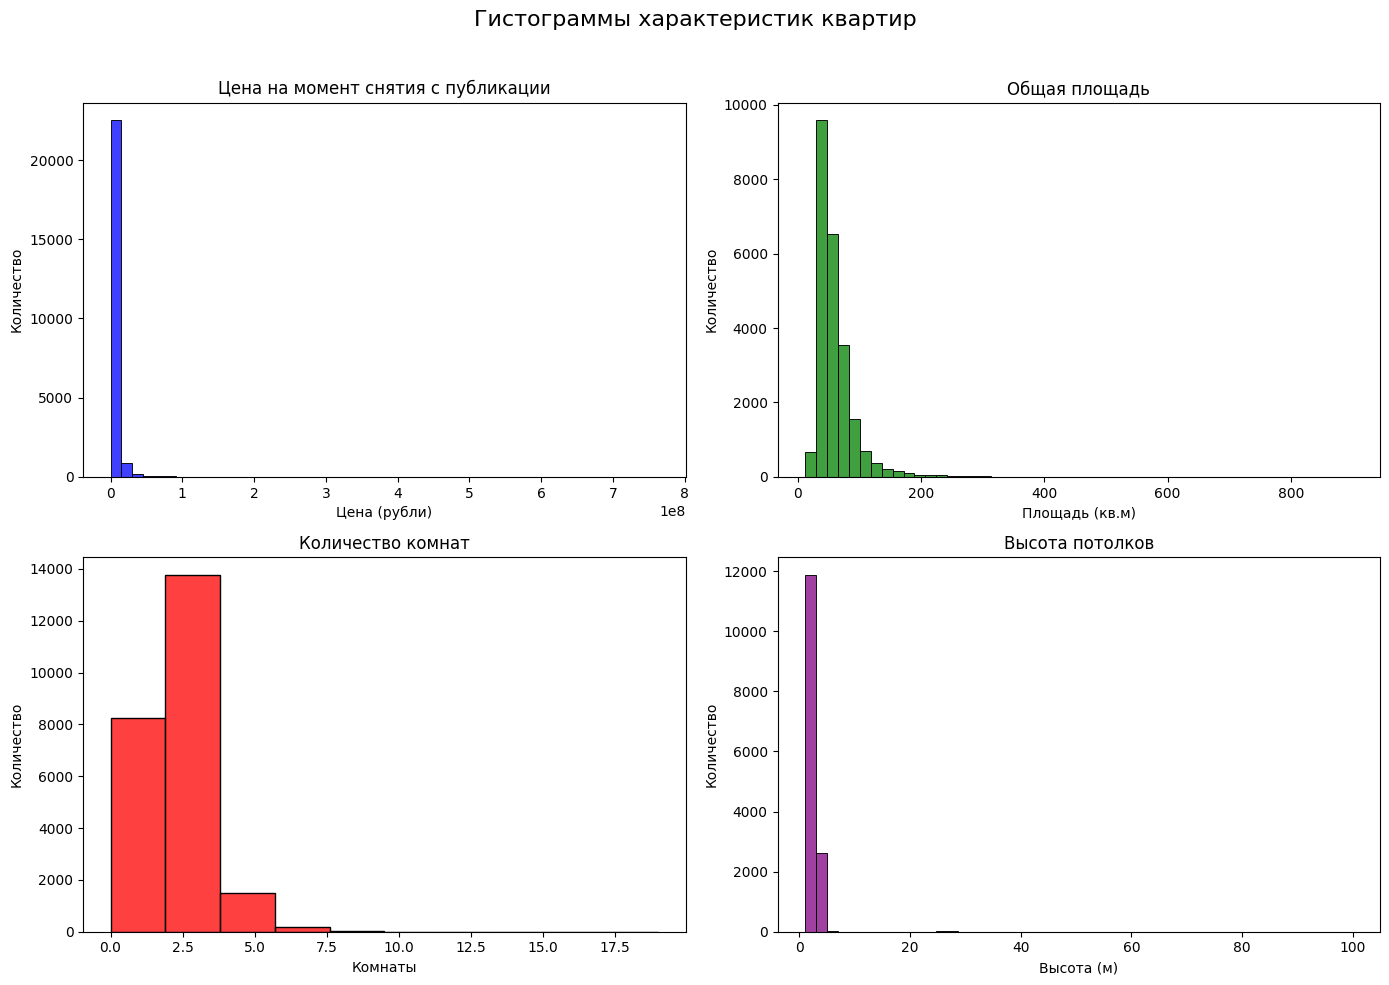

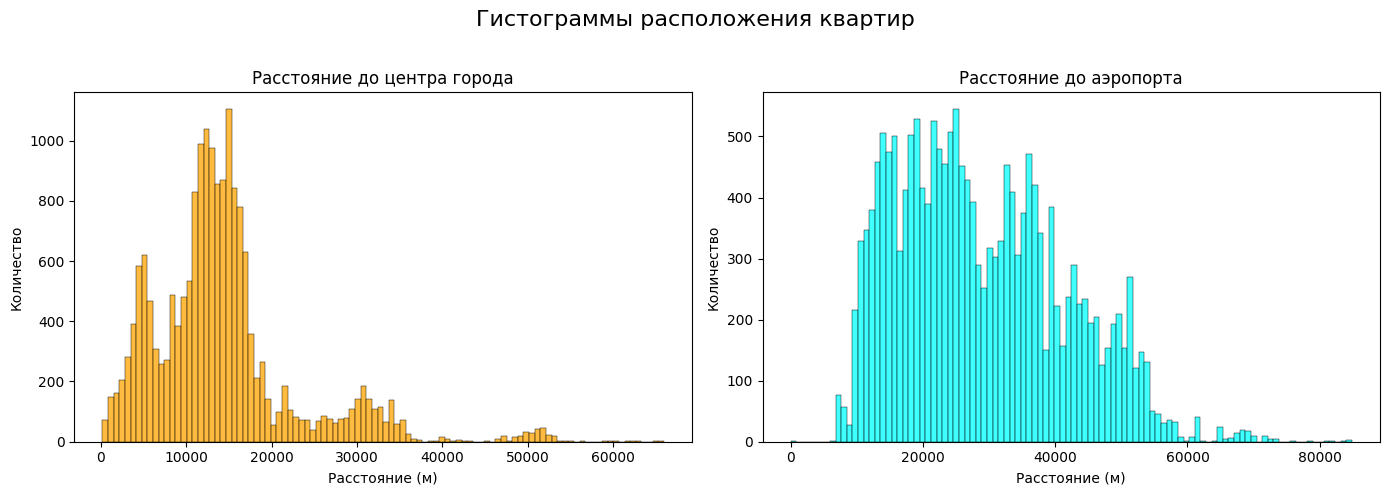

In [4]:
# Гистограммы для характеристик квартир
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Гистограммы характеристик квартир', fontsize=16)

sns.histplot(data['last_price'], bins=50, ax=axes[0, 0], color='blue')
axes[0, 0].set_title('Цена на момент снятия с публикации')
axes[0, 0].set_xlabel('Цена (рубли)')
axes[0, 0].set_ylabel('Количество')

sns.histplot(data['total_area'], bins=50, ax=axes[0, 1], color='green')
axes[0, 1].set_title('Общая площадь')
axes[0, 1].set_xlabel('Площадь (кв.м)')
axes[0, 1].set_ylabel('Количество')

sns.histplot(data['rooms'], bins=10, ax=axes[1, 0], color='red')
axes[1, 0].set_title('Количество комнат')
axes[1, 0].set_xlabel('Комнаты')
axes[1, 0].set_ylabel('Количество')

sns.histplot(data['ceiling_height'], bins=50, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Высота потолков')
axes[1, 1].set_xlabel('Высота (м)')
axes[1, 1].set_ylabel('Количество')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Гистограммы для расположения квартир
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Гистограммы расположения квартир', fontsize=16)

sns.histplot(data['cityCenters_nearest'], bins=100, ax=axes[0], color='orange')
axes[0].set_title('Расстояние до центра города')
axes[0].set_xlabel('Расстояние (м)')
axes[0].set_ylabel('Количество')

sns.histplot(data['airports_nearest'], bins=100, ax=axes[1], color='cyan')
axes[1].set_title('Расстояние до аэропорта')
axes[1].set_xlabel('Расстояние (м)')
axes[1].set_ylabel('Количество')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Общие выводы**

Анализ гистограмм показывает, что основные характеристики квартир, такие как цена, общая площадь, количество комнат и высота потолков, имеют значительные выбросы, что может указывать на ошибки в данных или наличие элитных объектов. Основная масса квартир имеет средние значения характеристик, что свидетельствует о типичных городских квартирах. 

Расположение квартир также имеет тенденцию к сосредоточению в определенных диапазонах расстояний от центра города и аэропорта, что указывает на плотность застройки и удобство транспортной доступности.

### Выполните предобработку данных


In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [6]:
# Заменяем пропущенные значения в столбце 'ceiling_height' на среднюю высоту потолка
data['ceiling_height'] = data['ceiling_height'].fillna(value=data['ceiling_height'].mean())

In [7]:
# Заполнение пропущенных значений в столбце floors_total медианой
data['floors_total'] = data['floors_total'].fillna(value=data['floors_total'].median())
# Проверка наличия ошибок: этаж квартиры выше, чем количество этажей в доме
errors = data[data['floor'] > data['floors_total']]
print(f'количество ошибок: {len(errors)}')
# Исправление ошибок: приравниваем floors_total к значению floor, если оно больше
data.loc[data['floor'] > data['floors_total'], 'floors_total'] = data['floor']
# Повторная проверка наличия ошибок после исправления
errors1 = data[data['floor'] > data['floors_total']]
print(f'количество ошибок после коррекции: {len(errors1)}')

количество ошибок: 37
количество ошибок после коррекции: 0


In [8]:
# Заполнение пропусков в столбце living_area медианой для каждой группы комнат
data['living_area'] = data.groupby('rooms')['living_area'].transform(lambda x: x.fillna(x.median()))

In [9]:
# Вывод количества значений True и False в столбце 'is_apartment' до заполнения пропусков
print(data['is_apartment'].value_counts())

# Замена пропущенных значений в столбце 'is_apartment' на False с использованием np.where
data['is_apartment'] = np.where(data['is_apartment'].isna(), False, data['is_apartment']).astype(bool)

# Проверка результатов
print(data['is_apartment'].value_counts())

is_apartment
False    2725
True       50
Name: count, dtype: int64
is_apartment
False    23649
True        50
Name: count, dtype: int64


In [10]:
# Находим наиболее часто встречающееся значение в столбце 'locality_name'
frequent_city = data['locality_name'].mode()[0]
# Заполняем пропуски в столбце 'locality_name' этим значением
data['locality_name'] = data['locality_name'].fillna(frequent_city)

In [11]:
# Создание функции для заполнения пропусков медианными
def finding_median(data, columns):
    # Перебор по каждому столбцу в списке columns    
    for column in columns:
        # Заполнение пропущенных значений медианными значениями столбца
        data[column] = data[column].fillna(value=data[column].median())
            # Возвращение измененных данных
    return data
# Список столбцов для заполнения пропусков
fixed_columns = ['kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'ponds_nearest', 'parks_nearest']
# Применение функции к данным
finding_median(data, fixed_columns).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.700000,16.0,51.0,8,False,False,False,25.0,1.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.771499,11.0,18.6,1,False,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,455.0,0.0,502.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.771499,5.0,34.3,4,False,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.771499,14.0,45.0,9,False,False,False,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.0,13,False,False,False,41.0,1.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


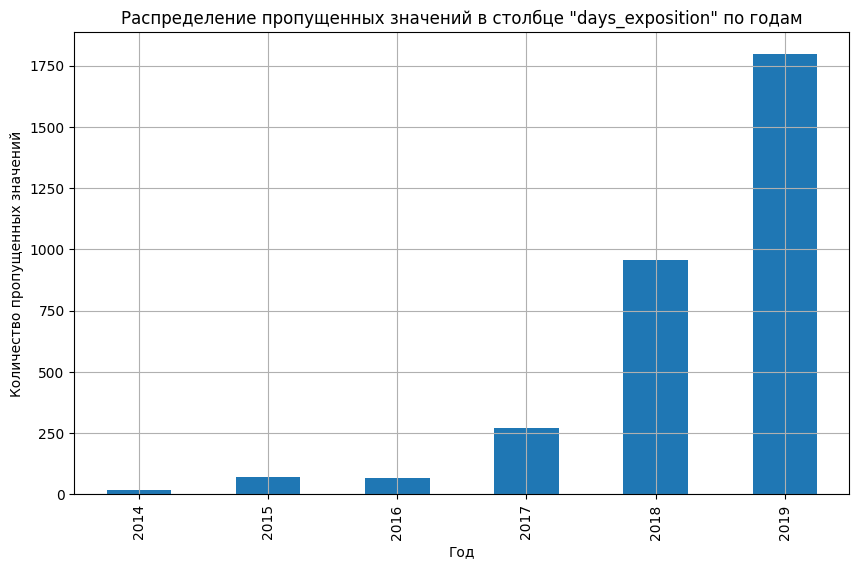

In [12]:
#Преобразование столбца 'first_day_exposition' в формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# Поиск строк с пропущенными значениями в столбце days_exposition
missing_days_exposition = data[data['days_exposition'].isna()].copy()

# Добавление года публикации объявления в датафрейм с использованием метода .loc[]
missing_days_exposition.loc[:, 'year'] = missing_days_exposition['first_day_exposition'].dt.year

# Построение графика распределения пропущенных значений по годам
missing_days_exposition['year'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Распределение пропущенных значений в столбце "days_exposition" по годам')
plt.xlabel('Год')
plt.ylabel('Количество пропущенных значений')
plt.grid(True)
plt.show()

**Вывод на основе графика**

На графике видно, что основная часть пропущенных значений в столбце `days_exposition` приходится на 2019 год. В этом году наблюдается резкое увеличение количества пропусков по сравнению с предыдущими годами.

Это наблюдение может указывать на следующие возможные причины:

1. **Не случайный характер пропусков:** Поскольку большая часть пропущенных значений сосредоточена в 2019 году, это может свидетельствовать о каких-то изменениях в процессе сбора данных или заполнения объявлений в этот период. Возможно, изменился формат ввода данных или произошли сбои в системе, что привело к неполному заполнению информации.

2. **Изменение правил или условий:** Возможна ситуация, когда в 2019 году были изменены правила или условия, при которых собирались данные. Например, может быть введен новый метод публикации объявлений, который не требовал или не позволял заполнять `days_exposition`.

3. **Влияние внешних факторов:** Такие внешние факторы, как изменения на рынке недвижимости, экономические условия или административные меры, также могли повлиять на увеличение пропусков в данных в 2019 году.

Таким образом, пропуски в столбце `days_exposition` не являются случайными и требуют дополнительного анализа и размышлений. Возможно, стоит более подробно изучить контекст и условия, при которых собирались данные в 2019 году, чтобы понять причину такого резкого увеличения пропусков.

**Общий вывод по проделанной работе**

1. **Найдены пропущенные значения.**
   - В ходе анализа данных было выявлено, что в некоторых столбцах имеются пропущенные значения. Пропуски присутствовали в таких столбцах, как `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, и `days_exposition`.

2. **Пропущенные значения заполнены там, где это возможно.**
   - **ceiling_height:** Пропущенные значения были заменены на среднюю высоту потолка, так как явных выбросов не было замечено.
   - **floors_total:** Пропуски были заполнены медианой. В случаях, когда этаж квартиры был выше количества этажей в доме, значение `floors_total` было приравнено к `floor`.
   - **living_area:** Пропущенные значения были заполнены медианой для каждой группы по количеству комнат.
   - **is_apartment:** Пропуски были заполнены значением `False`, так как данных о типе недвижимости не было, и предполагалось, что это не апартаменты.
   - **locality_name:** Пропуски были заполнены наиболее часто встречающимся значением.
   - **kitchen_area, balcony, airports_nearest, cityCenters_nearest, parks_around3000, ponds_nearest, days_exposition, parks_nearest, ponds_around3000:** Пропуски были заполнены медианными значениями.

3. **Объяснено, какие пропущенные значения обнаружены.**
   - Пропущенные значения в столбце `ceiling_height` не имели общих признаков для заполнения, поэтому было решено использовать среднее значение.
   - В столбце `floors_total` пропущенные значения не имели общих признаков, однако были случаи, когда этаж квартиры был выше количества этажей в доме. Поэтому было решено использовать медиану и корректировать ошибки.
   - Пропуски в `living_area` были заполнены медианными значениями в зависимости от количества комнат.
   - В столбце `is_apartment` большинство значений было `False`, поэтому пропуски были заполнены этим значением.
   - Пропущенные значения в `locality_name` были заполнены наиболее часто встречающимся значением, так как их количество было незначительным.
   - Для остальных столбцов пропуски были заполнены медианными значениями, так как это наиболее подходящий метод для числовых данных.

In [13]:
#Преобразование столбца 'first_day_exposition' в формат даты
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**Общий вывод**

 **Корректный тип данных**

После проведенного анализа и преобразований все столбцы в датафрейме имеют корректные типы данных. Это подтверждается вызовом метода `data.info()`, который показывает следующее распределение типов данных:

- **int64:** `total_images`, `rooms`, `floor`
- **float64:** `last_price`, `total_area`, `ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`
- **bool:** `is_apartment`, `studio`, `open_plan`
- **object:** `locality_name`
- **datetime64[ns]:** `first_day_exposition`

**В каких столбцах изменён тип данных и почему**

1. **`first_day_exposition`:**
   - **До преобразования:** Столбец имел тип данных `object` (строка).
   - **После преобразования:** Тип данных изменен на `datetime64[ns]`.
   - **Причина:** Преобразование необходимо для корректной работы с датами и временными рядами, что позволяет выполнять операции с датами, такие как сравнение и вычисление разниц между датами.
   

2. **`is_apartment`:**
   - **До преобразования:** Столбец содержал пропущенные значения и имел тип данных `object`.
   - **После преобразования:** Тип данных изменен на `bool`.
   - **Причина:** Булевые значения более точно отражают логический смысл данных, указывая, является ли объект апартаментами или нет. Пропущенные значения заменены на `False`, так как большинство объектов не являются апартаментами.
   

3. **Заполнение пропусков:**
   - **Столбцы:** `ceiling_height`, `floors_total`, `living_area`, `kitchen_area`, `balcony`, `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, `ponds_nearest`.
   - **Причина:** Пропущенные значения в этих столбцах заполнены медианными значениями для обеспечения целостности данных и предотвращения ошибок при анализе. Это особенно важно для столбцов с числовыми значениями, где наличие пропусков может сильно исказить результаты анализа.

In [15]:
# Выводим количество уникальных значений в столбце 'locality_name' до преобразований
print(f'Количество уникальных значений до коррекции: {len(data["locality_name"].unique())}')

# Преобразуем названия населенных пунктов к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()

# Удаляем пробелы в начале и конце названий населенных пунктов
data['locality_name'] = data['locality_name'].str.strip()

# Заменяем букву "ё" на "е"
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')

# Словарь для замены различных форм названий населенных пунктов на единый формат
replacements = {
    'городской посёлок': 'городской поселок',
    'посёлок': 'поселок',
    'деревня': 'деревня',
    'село': 'село',
    'коттеджный посёлок': 'коттеджный поселок',
    'садоводческое некоммерческое товарищество': 'садоводческое товарищество',
    'городской поселок': 'городской поселок',
    'поселок': 'поселок'
}

# Выполняем замену согласно словарю replacements
data['locality_name'] = data['locality_name'].replace(replacements, regex=True)

# Выводим количество уникальных значений в столбце 'locality_name' после преобразований
print(f'Количество уникальных значений после коррекции: {len(data["locality_name"].unique())}')

Количество уникальных значений до коррекции: 364
Количество уникальных значений после коррекции: 330


### Добавьте в таблицу новые столбцы со следующими параметрами:

In [16]:
# Вычисляем цену одного квадратного метра, деля стоимость объекта на его общую площадь,
# и округляем результат до двух знаков после запятой
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2)

In [17]:
# Добавляем новый столбец 'day_of_week', который содержит день недели публикации объявления
data['day_of_week'] = data['first_day_exposition'].dt.dayofweek

# Добавляем новый столбец 'month_of_exposition', который содержит месяц публикации объявления
data['month_of_exposition'] = data['first_day_exposition'].dt.month

# Добавляем новый столбец 'year_of_exposition', который содержит год публикации объявления
data['year_of_exposition'] = data['first_day_exposition'].dt.year

In [18]:
# Определение функции для классификации типа этажа
def floor_type(row):
        # Если этаж первый
    if row['floor'] == 1:
        return 'первый'
        # Если этаж последний
    elif row['floor'] == row['floors_total']:
        return 'последний'
        # В остальных случаях
    else:
        return 'другой'
    # Применение функции к каждой строке DataFrame и создание нового столбца 'store_category' с типом этажа
data['store_category'] = data.apply(floor_type, axis =1)

In [19]:
# Переводим расстояние до центра города из метров в километры и округляем до ближайшего целого значения
data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round()

**Вывод по добавлению новых столбцов**

**1. Цена одного квадратного метра:**
- Новый столбец `price_square_meter` вычислен путем деления стоимости объекта на его общую площадь. Результат округлен до двух знаков после запятой.
- Этот параметр позволит более точно анализировать стоимость недвижимости, сравнивая цену квадратного метра в различных объектах.

**2. День недели, месяц и год публикации объявления:**
- Добавлены три новых столбца: `day_of_week`, `month_of_exposition` и `year_of_exposition`, которые содержат информацию о дне недели, месяце и годе публикации объявления соответственно.
- Эти данные помогут выявить тенденции и сезонные колебания на рынке недвижимости.

**3. Тип этажа:**
- Введен новый столбец `store_category`, который классифицирует этаж как "первый", "последний" или "другой" в зависимости от его номера и общего количества этажей в доме.
- Данная классификация полезна для анализа влияния этажа на стоимость квартиры и предпочтения покупателей.

**4. Расстояние до центра города:**
- Новый столбец `cityCenters_nearest_km` содержит расстояние до центра города, переведенное из метров в километры и округленное до ближайшего целого значения.
- Это преобразование упростит анализ зависимости стоимости недвижимости от удаленности от центра города.

**Общие выводы**

Добавление этих столбцов позволяет более глубоко и детально анализировать данные о недвижимости. Новый уровень детализации поможет выявить скрытые закономерности и тренды, улучшить точность моделей прогнозирования стоимости и обнаруживать аномалии и потенциальные случаи мошенничества.


### Проведите исследовательский анализ данных


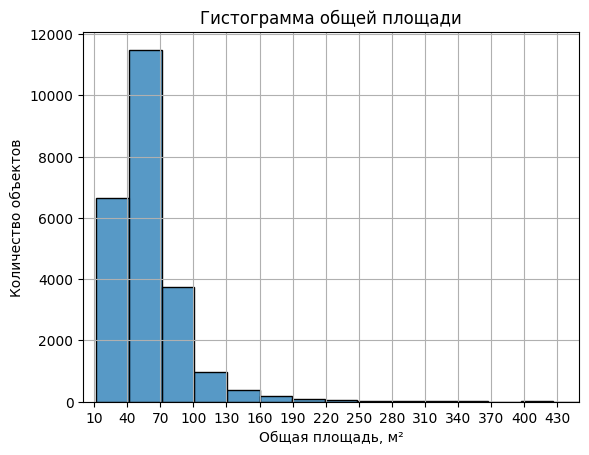

In [20]:
# Построение гистограммы с 30 корзинами
sns.histplot(data['total_area'], bins=30, kde=False)

# Установка заголовка графика
plt.title('Гистограмма общей площади')

# Установка подписи для оси X
plt.xlabel('Общая площадь, м²')

# Установка подписи для оси Y
plt.ylabel('Количество объектов')

# Установка меток на оси X с шагом 30 от 10 до 450
plt.xticks(np.arange(10, 450, 30))

# Включение сетки на графике
plt.grid(True)

# Установка предела по оси X до 450 для лучшего отображения
plt.xlim(0, 450)

# Отображение графика
plt.show()

**На основе полученного графика можно сделать следующие выводы:**

**Распределение объектов по общей площади:**
- Большинство объектов имеют общую площадь от 12 до 100 квадратных метров.
- Наиболее часто встречающаяся категория – объекты с площадью от 40 до 70 квадратных метров.

**Распределение площади:**
- Гистограмма показывает значительное снижение количества объектов с увеличением площади. Объекты с площадью больше 100 квадратных метров встречаются значительно реже.
- Максимальная площадь объектов в данных достигает до 450 квадратных метров, однако таких объектов очень мало.

**Следующий шаг:**
- Для более детального анализа и выявления аномальных значений, в следующем шаге будет построена диаграмма размаха. Это позволит лучше понять распределение данных и выделить выбивающиеся значения.


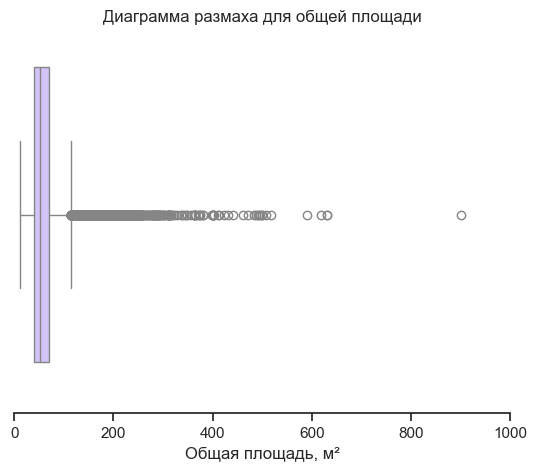

In [21]:
# Установка темы для графика
sns.set_theme(style="ticks", palette="pastel")

# Построение диаграммы размаха для столбца total_area
sns.boxplot(x=data['total_area'], color="m")

# Настройки графика
plt.title('Диаграмма размаха для общей площади')
plt.xlabel('Общая площадь, м²')
plt.xlim([0, 1000])  # Установка предела по оси X до 1000 для лучшего отображения

# Удаление границ
sns.despine(offset=10, trim=True)

# Показ графика
plt.show()

In [22]:
# Вывод первых пяти строк из данных, где общая площадь объекта больше или равна 190 квадратным метрам.
data.query('190 <= total_area').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_of_week,month_of_exposition,year_of_exposition,store_category,cityCenters_nearest_km
155,8,96000000.0,317.0,2017-07-07,4,3.500000,3.0,183.0,3,False,False,False,9.1,1.0,санкт-петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0,302839.12,4,7,2017,последний,2.0
464,15,66571000.0,280.3,2015-06-11,6,5.200000,8.0,159.5,7,False,False,False,21.1,0.0,санкт-петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0,237499.11,3,6,2015,другой,7.0
492,18,95000000.0,216.0,2017-12-05,4,3.000000,5.0,86.0,4,False,False,False,77.0,1.0,санкт-петербург,21740.0,436.0,2.0,138.0,3.0,620.0,14.0,439814.81,1,12,2017,другой,0.0
509,5,90000000.0,225.0,2016-06-26,6,2.771499,4.0,134.0,2,False,False,False,19.5,2.0,санкт-петербург,32864.0,5720.0,0.0,455.0,2.0,519.0,416.0,400000.00,6,6,2016,другой,6.0
521,20,25717300.0,230.1,2015-01-21,3,2.771499,3.0,130.0,1,False,False,False,26.1,1.0,пушкин,16877.0,29030.0,2.0,676.0,3.0,278.0,1441.0,111765.75,2,1,2015,первый,29.0


In [23]:
# Вычисление доли объектов с общей площадью больше или равной 190 квадратным метрам в процентах от общего числа объектов.
# Сначала отбираем все объекты, где общая площадь больше или равна 190 кв.м.
# Затем делим количество таких объектов на общее количество объектов в датасете и умножаем на 100 для получения процента.
(len(data.query('190 < total_area')) / (len(data)))* 100

1.0802143550360774

In [24]:
# Создание нового DataFrame без строк с аномалиями
data_good = data.query('total_area < 190')

**Вывод:**

На основе диаграммы размаха можно сделать следующие выводы:

1. **Распределение общей площади:**
   - Основная масса объектов сосредоточена в диапазоне до 100 квадратных метров.
   - Наблюдаются выбросы, объекты с площадью значительно выше 100 квадратных метров, вплоть до 1000 квадратных метров.

2. **Анализ объектов с большой площадью:**
   - Доля объектов с площадью более 190 квадратных метров составляет около 1.08% от общего числа объектов в выборке.
   - Несмотря на то, что такие объекты составляют небольшую долю, их наличие может повлиять на общую статистику и выводы анализа.

3. **Подозрения на аномалии:**
   - Нельзя с точностью утверждать, что данные по квартирам с площадью 190 кв. м и выше искажены.
   - При анализе видно, что объекты с большой площадью часто имеют большее количество комнат, что может говорить в пользу их реальности.
   - Однако, возможно, что часть таких данных относится не к квартирам, а, например, к общежитиям или другим типам жилых помещений.

4. **Создание отдельного DataFrame:**
   - Для более точного анализа и исключения возможных аномалий был создан отдельный DataFrame, включающий только объекты с общей площадью менее 190 квадратных метров.
   - Этот новый DataFrame позволяет сосредоточиться на основной массе данных, исключив влияние выбросов и аномальных значений.

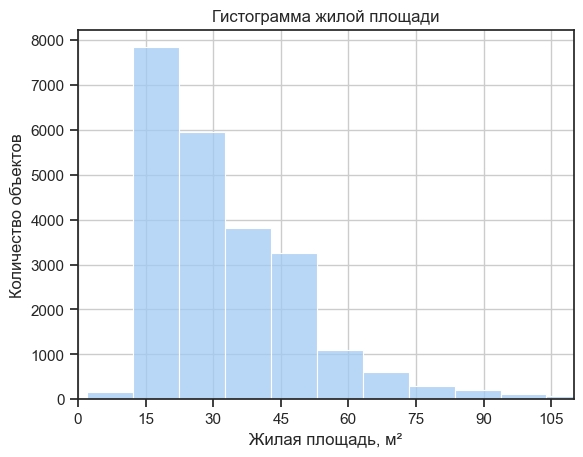

In [25]:
# Построение гистограммы с 30 корзинами для столбца 'living_area'
sns.histplot(data['living_area'], bins=40, kde=False)

# Установка заголовка графика
plt.title('Гистограмма жилой площади')

# Установка подписи для оси X
plt.xlabel('Жилая площадь, м²')

# Установка подписи для оси Y
plt.ylabel('Количество объектов')

# Установка меток на оси X с шагом 30 от 10 до 450
plt.xticks(np.arange(0, 110, 15))

# Включение сетки на графике
plt.grid(True)

# Установка предела по оси X до 450 для лучшего отображения
plt.xlim(0, 110)

# Отображение графика
plt.show()


**Вывод:**

На основе гистограммы жилой площади можно сделать следующие выводы:

**Распределение жилой площади:**
- Основная масса объектов имеет жилую площадь от 15 до 45 квадратных метров.
- Наиболее часто встречающаяся категория — объекты с жилой площадью от 15 до 30 квадратных метров.

**Распределение по количеству объектов:**
- Гистограмма показывает значительное снижение количества объектов с увеличением жилой площади.
- Объекты с жилой площадью больше 60 квадратных метров встречаются значительно реже.

**Анализ объектов с большой жилой площадью:**
- Наблюдаются выбросы, объекты с жилой площадью значительно выше 60 квадратных метров, вплоть до 105 квадратных метров. Такие объекты могут повлиять на общую статистику и выводы анализа.

**Наблюдения для диапазона от 2 до 13 квадратных метров:**
- На графике также заметны объекты с жилой площадью от 2 до 13 квадратных метров, хотя их количество невелико.

**Следующий шаг:**
- Для более детального анализа и выявления аномальных значений, в следующем шаге будет построена диаграмма размаха. Это позволит лучше понять распределение данных и выделить выбивающиеся значения.


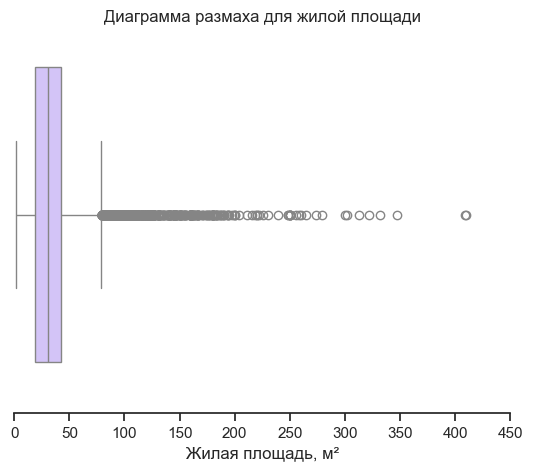

In [26]:
# Установка темы и палитры для графика
sns.set_theme(style="ticks", palette="pastel")

# Построение диаграммы размаха для столбца living_area
sns.boxplot(x=data['living_area'], color="m")

# Настройки графика
plt.title('Диаграмма размаха для жилой площади')
plt.xlabel('Жилая площадь, м²')
plt.xlim([0, 450])  # Установка предела по оси X до 450 для лучшего отображения

# Удаление границ
sns.despine(offset=10, trim=True)

# Показ графика
plt.show()


In [27]:
# Отображение первых строк данных с жилой площадью более 90 кв.м.
data.query('living_area > 90').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_of_week,month_of_exposition,year_of_exposition,store_category,cityCenters_nearest_km
35,6,15500000.0,149.0,2017-06-26,5,2.771499,5.0,104.0,4,False,False,False,17.0,1.0,санкт-петербург,23670.0,3502.0,0.0,455.0,1.0,779.0,644.0,104026.85,0,6,2017,другой,4.0
52,20,11795000.0,136.0,2017-09-22,6,3.000000,2.0,94.0,2,False,False,False,11.0,1.0,санкт-петербург,16510.0,6582.0,1.0,526.0,0.0,502.0,NaN,86727.94,4,9,2017,последний,7.0
147,10,27700000.0,179.6,2017-07-06,5,2.850000,25.0,97.2,25,False,False,False,33.8,2.0,санкт-петербург,19424.0,4489.0,0.0,455.0,1.0,806.0,75.0,154231.63,3,7,2017,последний,4.0
155,8,96000000.0,317.0,2017-07-07,4,3.500000,3.0,183.0,3,False,False,False,9.1,1.0,санкт-петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0,302839.12,4,7,2017,последний,2.0
335,1,21800000.0,163.4,2017-12-10,5,3.500000,5.0,119.5,2,False,False,False,10.0,1.0,санкт-петербург,26791.0,5493.0,1.0,349.0,0.0,502.0,106.0,133414.93,6,12,2017,другой,5.0


In [28]:
# Общий размер набора данных
total_rows = len(data)
print(f'Общее количество объектов: {total_rows}')

# Процент объектов с жилой площадью более 90 кв.м. в общем наборе данных
percentage_living_area_above_90_total = (len(data.query('living_area > 90')) / total_rows) * 100
print(f'Процент объектов с жилой площадью более 90 кв.м. (всего): {percentage_living_area_above_90_total:.2f}%')

# Размер отфильтрованного набора данных
filtered_rows = len(data_good)
print(f'Количество объектов в отфильтрованном наборе данных: {filtered_rows}')

# Процент объектов с жилой площадью более 90 кв.м. в отфильтрованном наборе данных
percentage_living_area_above_90_filtered = (len(data.query('living_area > 90')) / filtered_rows) * 100
print(f'Процент объектов с жилой площадью более 90 кв.м. (отфильтрованные данные): {percentage_living_area_above_90_filtered:.2f}%')


Общее количество объектов: 23699
Процент объектов с жилой площадью более 90 кв.м. (всего): 2.24%
Количество объектов в отфильтрованном наборе данных: 23434
Процент объектов с жилой площадью более 90 кв.м. (отфильтрованные данные): 2.27%


In [29]:
# Дополнительная фильтрация отфильтрованного набора данных по жилой площади
data_good = data_good.query('living_area < 90')

**Вывод:**

На основе диаграммы размаха для жилой площади можно сделать следующие выводы:

**Распределение жилой площади:**

- Основная масса объектов сосредоточена в диапазоне до 90 квадратных метров.
- Наблюдаются выбросы, объекты с жилой площадью значительно выше 90 квадратных метров, вплоть до 450 квадратных метров.

**Анализ объектов с большой жилой площадью:**

- Процент объектов с жилой площадью более 90 кв.м. составляет около 2.24% от общего числа объектов в выборке.
- Несмотря на то, что такие объекты составляют небольшую долю, их наличие может повлиять на общую статистику и выводы анализа.
- В отфильтрованном наборе данных (после удаления объектов с общей площадью более 190 кв.м.) процент объектов с жилой площадью более 90 кв.м. составляет около 2.27%.

**Подозрения на аномалии:**

- Нельзя с точностью утверждать, что данные по квартирам с жилой площадью более 90 кв.м. искажены, так как их доля незначительна.
- Для дальнейшего анализа были удалены объекты с жилой площадью более 90 кв.м. из отфильтрованного набора данных.

**Следующий шаг:**

- В следующем шаге будет дополнительно отфильтрован отфильтрованный набор данных по жилой площади, чтобы исключить аномальные значения и провести более точный анализ.


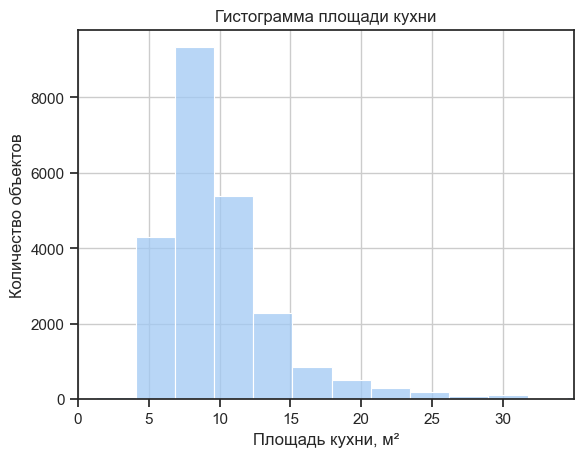

In [30]:
# Построение гистограммы с 40 корзинами для столбца 'kitchen_area'
sns.histplot(data['kitchen_area'], bins=40, kde=False)

# Установка заголовка графика
plt.title('Гистограмма площади кухни')

# Установка подписи для оси X
plt.xlabel('Площадь кухни, м²')

# Установка подписи для оси Y
plt.ylabel('Количество объектов')

# Установка меток на оси X с шагом 5 от 0 до 35
plt.xticks(np.arange(0, 35, 5))

# Включение сетки на графике
plt.grid(True)

# Установка предела по оси X до 35 для лучшего отображения
plt.xlim(0, 35)

# Отображение графика
plt.show()

**Вывод:**

На основе гистограммы площади кухни можно сделать следующие выводы:

**Распределение площади кухни:**

- Основная масса объектов имеет площадь кухни от 4 до 9 квадратных метров.
- Наиболее часто встречающаяся категория — объекты с площадью кухни от 7 до 12 квадратных метров.

**Распределение по количеству объектов:**

- Гистограмма показывает значительное снижение количества объектов с увеличением площади кухни.
- Объекты с площадью кухни более 15 квадратных метров встречаются значительно реже.

**Анализ объектов с большой площадью кухни:**

- Наблюдаются выбросы, объекты с площадью кухни значительно выше 15 квадратных метров, вплоть до 30 квадратных метров. Такие объекты могут повлиять на общую статистику и выводы анализа.

**Следующий шаг:**

Для более детального анализа и выявления аномальных значений, в следующем шаге будет построена диаграмма размаха. Это позволит лучше понять распределение данных и выделить выбивающиеся значения.


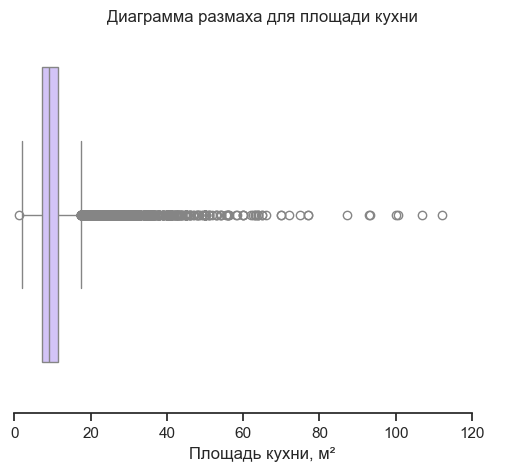

In [31]:
# Установка темы и палитры для графика
sns.set_theme(style="ticks", palette="pastel")

# Построение диаграммы размаха для столбца kitchen_area
sns.boxplot(x=data['kitchen_area'], color="m")

# Настройки графика
plt.title('Диаграмма размаха для площади кухни')
plt.xlabel('Площадь кухни, м²')
plt.xlim([0, 130])  # Установка предела по оси X до 130 для лучшего отображения

# Удаление границ
sns.despine(offset=10, trim=True)

# Показ графика
plt.show()

In [32]:
data.query('kitchen_area > 30').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_of_week,month_of_exposition,year_of_exposition,store_category,cityCenters_nearest_km
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,False,False,False,41.0,1.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0
51,7,45000000.0,161.0,2017-10-17,3,3.200000,8.0,38.0,4,False,False,False,50.0,1.0,санкт-петербург,32537.0,6589.0,0.0,455.0,3.0,99.0,541.0,279503.11,1,10,2017,другой,7.0
147,10,27700000.0,179.6,2017-07-06,5,2.850000,25.0,97.2,25,False,False,False,33.8,2.0,санкт-петербург,19424.0,4489.0,0.0,455.0,1.0,806.0,75.0,154231.63,3,7,2017,последний,4.0
239,16,22000000.0,119.0,2017-02-16,3,3.500000,5.0,56.0,3,False,False,False,35.0,0.0,санкт-петербург,21698.0,2004.0,1.0,688.0,1.0,86.0,77.0,184873.95,3,2,2017,другой,2.0
262,14,37500000.0,158.0,2019-01-24,4,2.771499,12.0,88.0,4,False,False,False,40.0,1.0,санкт-петербург,25799.0,4593.0,0.0,455.0,2.0,840.0,NaN,237341.77,3,1,2019,другой,5.0


In [33]:
# Общий размер набора данных
total_rows = len(data)
print(f'Общее количество объектов: {total_rows}')

# Процент объектов с площадью кухни более 30 кв.м. в общем наборе данных
percentage_kitchen_area_above_30_total = (len(data.query('kitchen_area > 30')) / total_rows) * 100
print(f'Процент объектов с площадью кухни более 30 кв.м. (всего): {percentage_kitchen_area_above_30_total:.2f}%')

# Размер отфильтрованного набора данных
filtered_rows = len(data_good)
print(f'Количество объектов в отфильтрованном наборе данных: {filtered_rows}')

# Процент объектов с площадью кухни более 30 кв.м. в отфильтрованном наборе данных
percentage_kitchen_area_above_30_filtered = (len(data.query('kitchen_area > 30')) / filtered_rows) * 100
print(f'Процент объектов с площадью кухни более 30 кв.м. (отфильтрованные данные): {percentage_kitchen_area_above_30_filtered:.2f}%')


Общее количество объектов: 23699
Процент объектов с площадью кухни более 30 кв.м. (всего): 1.36%
Количество объектов в отфильтрованном наборе данных: 23118
Процент объектов с площадью кухни более 30 кв.м. (отфильтрованные данные): 1.40%


In [34]:
# Удаляем из отфильтрованного набора данных объекты с площадью кухни более 30 кв.м.
data_good = data_good.query('kitchen_area < 30')

**Вывод:**

На основе диаграммы размаха для площади кухни можно сделать следующие выводы:

1. **Распределение площади кухни:**
   - Основная масса объектов сосредоточена в диапазоне до 30 квадратных метров.
   - Наблюдаются выбросы, объекты с площадью кухни значительно выше 30 квадратных метров, вплоть до 120 квадратных метров.

2. **Анализ объектов с большой площадью кухни:**
   - Процент объектов с площадью кухни более 30 кв.м. составляет около 1.36% от общего числа объектов в выборке.
   - В отфильтрованном наборе данных (после удаления объектов с общей площадью более 190 кв.м.) процент объектов с площадью кухни более 30 кв.м. составляет около 1.40%.

3. **Подозрения на аномалии:**
   - Нельзя с точностью утверждать, что данные по квартирам с площадью кухни более 30 кв.м. искажены, так как их доля незначительна. Возможно, это квартиры студии или евро-квартиры.
   - Для дальнейшего анализа были удалены объекты с площадью кухни более 30 кв.м. из отфильтрованного набора данных.

**Следующий шаг:**

Для более детального анализа и выявления аномальных значений, в следующем шаге будет дополнительно отфильтрован отфильтрованный набор данных по площади кухни, чтобы исключить аномальные значения и провести более точный анализ.

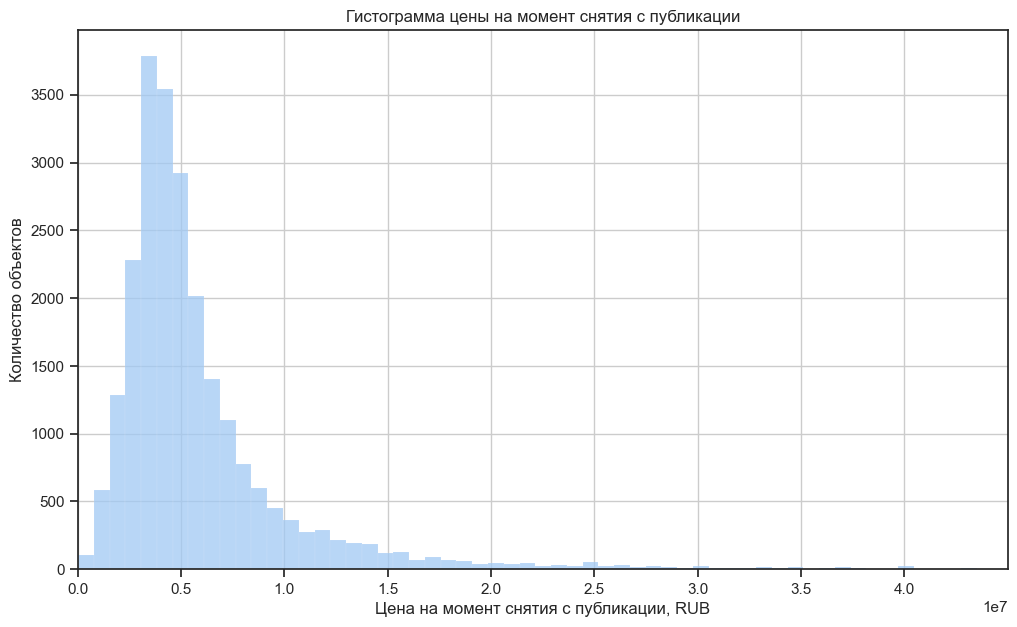

In [35]:
plt.figure(figsize=(12, 7))

# Построение гистограммы с 30 корзинами для столбца 'last_price'
sns.histplot(data['last_price'], bins=1000, kde=False)

# Установка заголовка графика
plt.title('Гистограмма цены на момент снятия с публикации')

# Установка подписи для оси X
plt.xlabel('Цена на момент снятия с публикации, RUB')

# Установка подписи для оси Y
plt.ylabel('Количество объектов')

# Установка меток на оси X с шагом 5 миллионов от 0 до 50 миллионов
plt.xticks(np.arange(0, 45000000, 5000000))

# Включение сетки на графике
plt.grid(True)

# Установка предела по оси X до 50 миллионов для лучшего отображения
plt.xlim(0, 45000000)

# Отображение графика
plt.show()

**Вывод:**

На основе гистограммы цены на момент снятия с публикации можно сделать следующие выводы:

**Распределение цены:**
- Основная масса объектов имеет цену на момент снятия с публикации до 5 миллионов рублей.
- Наиболее часто встречающаяся категория — объекты с ценой от 2 до 5 миллионов рублей.

**Распределение по количеству объектов:**
- Гистограмма показывает значительное снижение количества объектов с увеличением цены.
- Объекты с ценой выше 15 миллионов рублей встречаются значительно реже.

**Анализ объектов с высокой ценой:**
- Наблюдаются выбросы, объекты с ценой значительно выше 15 миллионов рублей, вплоть до 45 миллионов рублей. Такие объекты могут повлиять на общую статистику и выводы анализа.

**Следующий шаг:**
- Для более детального анализа и выявления аномальных значений, в следующем шаге будет построена диаграмма размаха. Это позволит лучше понять распределение данных и выделить выбивающиеся значения.


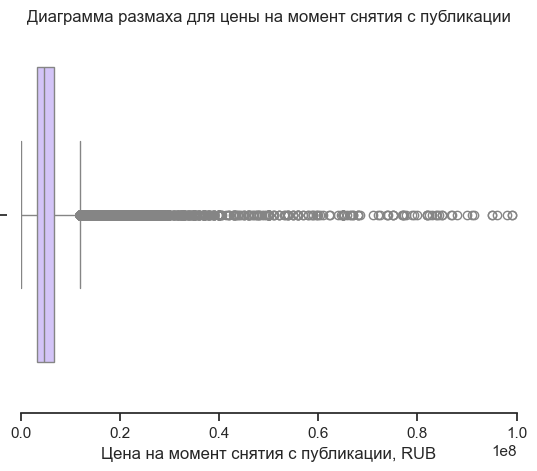

In [36]:
# Установка темы и палитры для графика
sns.set_theme(style="ticks", palette="pastel")

# Построение диаграммы размаха для столбца last_price
sns.boxplot(x=data['last_price'], color="m")

# Настройки графика
plt.title('Диаграмма размаха для цены на момент снятия с публикации')
plt.xlabel('Цена на момент снятия с публикации, RUB')
plt.xlim([0, 100000000])  # Установка предела по оси X до 100 миллионов для лучшего отображения

# Удаление границ
sns.despine(offset=10, trim=True)

# Показ графика
plt.show()

In [37]:
# Получение первых 5 строк, где цена превышает 40 миллионов
data.query('last_price > 40000000').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_of_week,month_of_exposition,year_of_exposition,store_category,cityCenters_nearest_km
3,0,64900000.0,159.0,2015-07-24,3,2.771499,14.0,45.0,9,False,False,False,9.1,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
51,7,45000000.0,161.0,2017-10-17,3,3.200000,8.0,38.0,4,False,False,False,50.0,1.0,санкт-петербург,32537.0,6589.0,0.0,455.0,3.0,99.0,541.0,279503.11,1,10,2017,другой,7.0
155,8,96000000.0,317.0,2017-07-07,4,3.500000,3.0,183.0,3,False,False,False,9.1,1.0,санкт-петербург,22673.0,1771.0,2.0,508.0,3.0,366.0,62.0,302839.12,4,7,2017,последний,2.0
411,1,40662000.0,151.0,2014-12-09,3,2.771499,8.0,85.0,3,False,False,False,23.0,1.0,санкт-петербург,33255.0,5975.0,1.0,630.0,3.0,100.0,594.0,269284.77,1,12,2014,другой,6.0
464,15,66571000.0,280.3,2015-06-11,6,5.200000,8.0,159.5,7,False,False,False,21.1,0.0,санкт-петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0,237499.11,3,6,2015,другой,7.0


In [38]:
# Общий размер набора данных
total_rows = len(data)
print(f'Общее количество объектов: {total_rows}')

# Процент объектов с ценой более 40 миллионов рублей в общем наборе данных
percentage_price_above_40m_total = (len(data.query('last_price > 40000000')) / total_rows) * 100
print(f'Процент объектов с ценой более 40 миллионов рублей (всего): {percentage_price_above_40m_total:.2f}%')

# Размер отфильтрованного набора данных
filtered_rows = len(data_good)
print(f'Количество объектов в отфильтрованном наборе данных: {filtered_rows}')

# Процент объектов с ценой более 40 миллионов рублей в отфильтрованном наборе данных
percentage_price_above_40m_filtered = (len(data.query('last_price > 40000000')) / filtered_rows) * 100
print(f'Процент объектов с ценой более 40 миллионов рублей (отфильтрованные данные): {percentage_price_above_40m_filtered:.2f}%')


Общее количество объектов: 23699
Процент объектов с ценой более 40 миллионов рублей (всего): 0.77%
Количество объектов в отфильтрованном наборе данных: 22838
Процент объектов с ценой более 40 миллионов рублей (отфильтрованные данные): 0.80%


In [39]:
# Дополнительная фильтрация отфильтрованного набора данных по цене
data_good = data_good.query('last_price < 40000000')

**Вывод:**

На основе диаграммы размаха для цены на момент снятия с публикации можно сделать следующие выводы:

1. **Распределение цен:**
   - Основная масса объектов сосредоточена в диапазоне до 40 миллионов рублей.
   - Наблюдаются выбросы, объекты с ценой значительно выше 40 миллионов рублей, вплоть до 100 миллионов рублей и даже выше, но было принято решение ограничеть график 100 миллионами.

2. **Анализ объектов с высокой ценой:**
   - Процент объектов с ценой более 40 миллионов рублей составляет около 0.77% от общего числа объектов в выборке.
   - Несмотря на то, что такие объекты составляют небольшую долю, их наличие может повлиять на общую статистику и выводы анализа.

3. **В отфильтрованном наборе данных:**
   - Процент объектов с ценой более 40 миллионов рублей составляет около 0.79%.
   - Для дальнейшего анализа были удалены объекты с ценой более 40 миллионов рублей из отфильтрованного набора данных.

4. **Подозрения на аномалии:**
   - Нельзя с точностью утверждать, что данные по квартирам с ценой более 40 миллионов рублей искажены, так как их доля незначительна. 

**Следующий шаг:**
   - Для более детального анализа и выявления аномальных значений, в следующем шаге будет построена диаграмма размаха. Это позволит лучше понять распределение данных и выделить выбивающиеся значения.


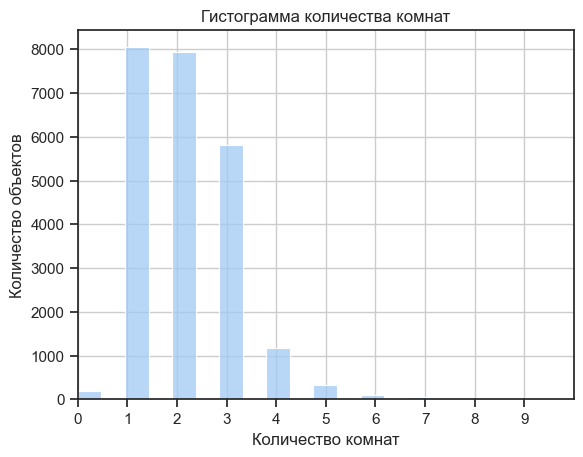

In [40]:
# Построение гистограммы с 100 корзинами для столбца 'rooms'
sns.histplot(data['rooms'], bins=40, kde=False)

# Установка заголовка графика
plt.title('Гистограмма количества комнат')

# Установка подписи для оси X
plt.xlabel('Количество комнат')

# Установка подписи для оси Y
plt.ylabel('Количество объектов')

# Установка меток на оси X с шагом 1 от 0 до 10
plt.xticks(np.arange(0, 10, 1))

# Включение сетки на графике
plt.grid(True)

# Установка предела по оси X до 10 для лучшего отображения
plt.xlim(0, 10)

# Отображение графика
plt.show()

In [41]:
data.query('rooms == 0').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,day_of_week,month_of_exposition,year_of_exposition,store_category,cityCenters_nearest_km
144,1,2450000.0,27.00,2017-03-30,0,2.771499,24.0,15.50,2,False,True,False,9.1,2.0,поселок мурино,26726.0,13098.5,NaN,455.0,NaN,502.0,181.0,90740.74,3,3,2017,другой,13.0
349,4,2320000.0,25.00,2017-09-27,0,2.771499,14.0,17.00,1,False,False,True,9.1,0.0,деревня кудрово,26726.0,13098.5,NaN,455.0,NaN,502.0,45.0,92800.00,2,9,2017,первый,13.0
440,8,2480000.0,27.11,2018-03-12,0,2.771499,17.0,24.75,4,False,True,False,9.1,2.0,санкт-петербург,38171.0,15015.0,0.0,455.0,2.0,982.0,64.0,91479.16,0,3,2018,другой,15.0
508,0,3375000.0,34.40,2017-03-28,0,2.771499,26.0,24.30,19,False,False,True,9.1,1.0,поселок парголово,53115.0,19292.0,0.0,455.0,1.0,593.0,430.0,98110.47,1,3,2017,другой,19.0
608,2,1850000.0,25.00,2019-02-20,0,2.771499,10.0,18.00,7,False,True,False,9.1,1.0,поселок шушары,26726.0,13098.5,NaN,455.0,NaN,502.0,29.0,74000.00,2,2,2019,другой,13.0


**Вывод:**

На основе гистограммы количества комнат можно сделать следующие выводы:

**Распределение количества комнат:**
- Основная масса объектов сосредоточена в диапазоне от 1 до 3 комнат.
- Наиболее часто встречающаяся категория — объекты с 1 и 2 комнатами.
- Объекты с количеством комнат более 4 встречаются значительно реже.

**Анализ объектов с малым количеством комнат:**
- На графике видно наличие объектов с 0 комнатой, что может быть связано с квартир-студиями или ошибками в данных.

**Следующий шаг:**
Для более детального анализа и выявления аномальных значений в следующем шаге будет построена диаграмма размаха. Это позволит лучше понять распределение данных и выделить выбивающиеся значения.


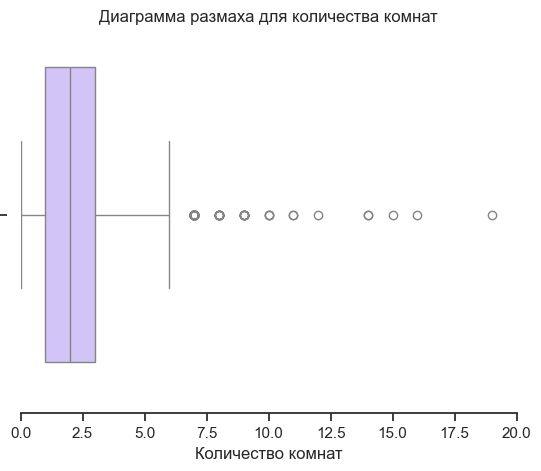

In [42]:
# Установка темы и палитры для графика
sns.set_theme(style="ticks", palette="pastel")

# Построение диаграммы размаха для столбца rooms
sns.boxplot(x=data['rooms'], color="m")

# Настройки графика
plt.title('Диаграмма размаха для количества комнат')
plt.xlabel('Количество комнат')
plt.xlim([0, 20])  # Установка предела по оси X до 10 для лучшего отображения

# Удаление границ
sns.despine(offset=10, trim=True)

# Показ графика
plt.show()

In [43]:
# Общий размер набора данных
total_rows = len(data)
print(f'Общее количество объектов: {total_rows}')

# Процент объектов с количеством комнат более 6 в общем наборе данных
percentage_rooms_above_6_total = (len(data.query('rooms > 6')) / total_rows) * 100
print(f'Процент объектов с количеством комнат более 6 (всего): {percentage_rooms_above_6_total:.2f}%')

# Размер отфильтрованного набора данных
filtered_rows = len(data_good)
print(f'Количество объектов в отфильтрованном наборе данных: {filtered_rows}')

# Процент объектов с количеством комнат более 6 в отфильтрованном наборе данных
percentage_rooms_above_6_filtered = (len(data.query('rooms > 6')) / filtered_rows) * 100
print(f'Процент объектов с количеством комнат более 6 (отфильтрованные данные): {percentage_rooms_above_6_filtered:.2f}%')


Общее количество объектов: 23699
Процент объектов с количеством комнат более 6 (всего): 0.38%
Количество объектов в отфильтрованном наборе данных: 22794
Процент объектов с количеством комнат более 6 (отфильтрованные данные): 0.39%


In [44]:
# Удаляем из отфильтрованного набора данных объекты с количеством комнат более 6
data_good = data_good.query('rooms < 6')

**Вывод**

**Распределение количества комнат:**

- Основная масса объектов имеет от 1 до 3 комнат.
- Наблюдаются выбросы: объекты с количеством комнат значительно выше 3, вплоть до 20 комнат.

**Анализ объектов с большим количеством комнат:**

- Процент объектов с количеством комнат более 6 составляет около 0.38% от общего числа объектов в выборке.
- В отфильтрованном наборе данных (после удаления объектов с большой общей площадью, жилой площадью и площадью кухни) процент объектов с количеством комнат более 6 составляет около 0.39%.

**Подозрения на аномалии:**

- Нельзя с точностью утверждать, что данные по квартирам с количеством комнат более 6 искажены, так как их доля незначительна.

**Следующий шаг:**

- Для дальнейшего анализа были удалены объекты с количеством комнат более 6 из отфильтрованного набора данных для более точного анализа.

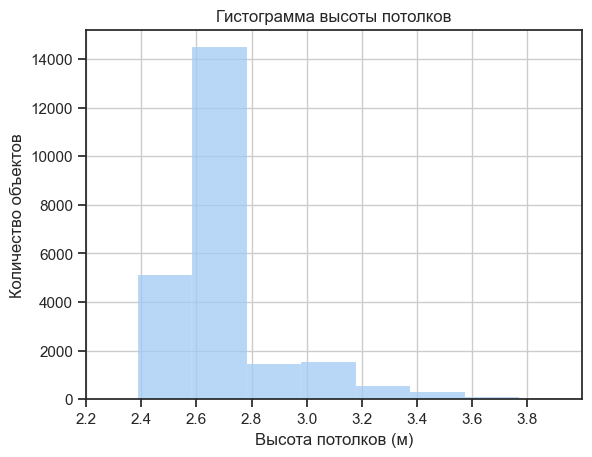

In [45]:
# Построение гистограммы с 100 корзинами для столбца 'ceiling_height'
sns.histplot(data['ceiling_height'], bins=500, kde=False)

# Установка заголовка графика
plt.title('Гистограмма высоты потолков')

# Установка подписи для оси X
plt.xlabel('Высота потолков (м)')

# Установка подписи для оси Y
plt.ylabel('Количество объектов')

# Установка меток на оси X с шагом 0.5 от 2.0 до 4.0
plt.xticks(np.arange(2, 4.0, 0.2))

# Включение сетки на графике
plt.grid(True)

# Установка предела по оси X до 4.0 для лучшего отображения
plt.xlim(2.2, 4.0)

# Отображение графика
plt.show()

**Вывод**

**Распределение высоты потолков:**

- Основная масса объектов имеет высоту потолков в диапазоне от 2.4 до 2.8 метров.
- Наблюдаются объекты с высотой потолков до 3.8 метров, однако их количество значительно меньше.

**Анализ объектов с большой высотой потолков:**

- Процент объектов с высотой потолков более 3 метров составляет незначительную долю от общего числа объектов в выборке.
- Высота потолков более 3 метров встречается реже, и для более детального анализа этих значений будет полезно построить диаграмму размаха.

**Подозрения на аномалии:**

- Высота потолков более 3 метров может быть аномальной, но для точного утверждения необходимо провести дополнительный анализ.

**Следующий шаг:**

- Построить диаграмму размаха для столбца `ceiling_height` с целью более детального анализа аномальных значений.


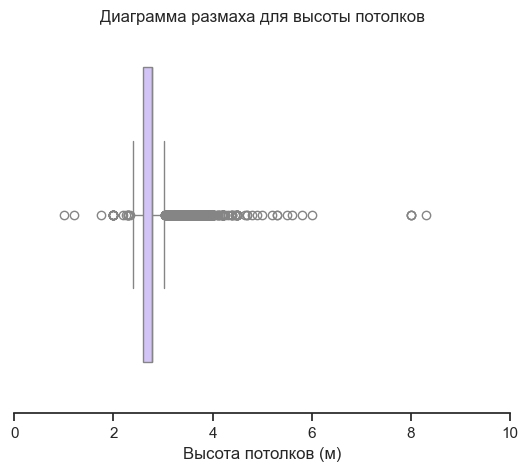

In [46]:
# Установка темы и палитры для графика
sns.set_theme(style="ticks", palette="pastel")

# Построение диаграммы размаха для столбца ceiling_height
sns.boxplot(x=data['ceiling_height'], color="m")

# Настройки графика
plt.title('Диаграмма размаха для высоты потолков')
plt.xlabel('Высота потолков (м)')
plt.xlim([0, 10])  # Установка предела по оси X до 4 для лучшего отображения

# Удаление границ
sns.despine(offset=10, trim=True)

# Показ графика
plt.show()

In [47]:
# Коррекция данных: изменение значений высоты потолков больше 20 метров
# Предполагается, что ошибка в записи, и значение 25.0 на самом деле должно быть 2.5 и т.д.
data.loc[data['ceiling_height'] > 20, 'ceiling_height'] = data['ceiling_height'] / 10

# Проверка коррекции данных: вывод значений высоты потолков больше 20 метров
len(data.query('ceiling_height > 20'))

0

In [48]:
# Общий размер набора данных
total_rows = len(data)
print(f'Общее количество объектов: {total_rows}')

# Процент объектов с высотой потолков более 6 метров и менее 2 метров в общем наборе данных
anomalous_ceiling_height_total = (len(data.query('ceiling_height > 6')) + len(data.query('ceiling_height < 2'))) / total_rows * 100
print(f'Процент объектов с высотой потолков более 6 метров и менее 2 метров (всего): {anomalous_ceiling_height_total:.2f}%')

# Размер отфильтрованного набора данных
filtered_rows = len(data_good)
print(f'Количество объектов в отфильтрованном наборе данных: {filtered_rows}')

# Процент объектов с высотой потолков более 6 метров и менее 2 метров в отфильтрованном наборе данных
anomalous_ceiling_height_filtered = (len(data_good.query('ceiling_height > 6')) + len(data_good.query('ceiling_height < 2'))) / filtered_rows * 100
print(f'Процент объектов с высотой потолков более 6 метров и менее 2 метров (отфильтровано): {anomalous_ceiling_height_filtered:.2f}%')


Общее количество объектов: 23699
Процент объектов с высотой потолков более 6 метров и менее 2 метров (всего): 0.05%
Количество объектов в отфильтрованном наборе данных: 22775
Процент объектов с высотой потолков более 6 метров и менее 2 метров (отфильтровано): 0.14%


In [49]:
# Фильтрация данных: оставляем только объекты с высотой потолков от 2 до 6 метров
data_good = data_good.query('2 < ceiling_height < 6')

**Вывод**

**Распределение высоты потолков:**

- Основная масса объектов имеет высоту потолков в диапазоне от 2.4 до 2.8 метров.
- Наблюдаются объекты с высотой потолков до 3.8 метров, однако их количество значительно меньше.

**Подозрения на аномалии и их коррекция:**

- Обнаружены объекты с высотой потолков более 20 метров. Предполагается, что это ошибки записи, где значения 25.0, 30.0 и т.д. должны быть 2.5, 3.0 и т.д.
- Произведена коррекция данных: значения высоты потолков больше 20 метров были изменены на десятичные значения (деление на 10).

**Процент объектов с высотой потолков более 6 метров и менее 2 метров:**

- В общем наборе данных процент таких объектов составляет 0.05%.
- В отфильтрованном наборе данных процент таких объектов составляет 0.14%.

**Фильтрация данных:**

- Для дальнейшего анализа оставлены только объекты с высотой потолков от 2 до 6 метров.


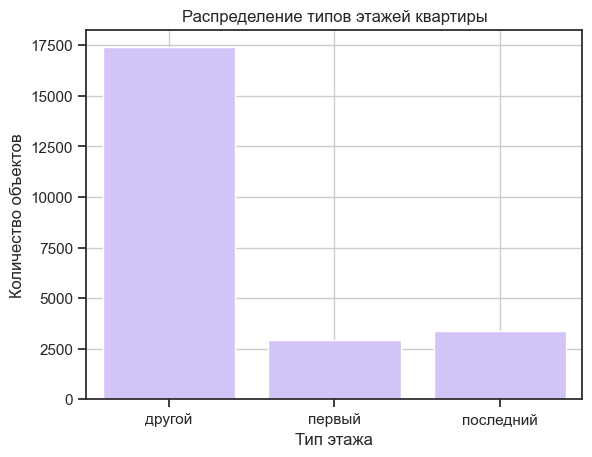

In [50]:
# Построение столбчатой диаграммы для категориального столбца 'store_category'
sns.countplot(x='store_category', data=data, color="m")

# Установка заголовка графика
plt.title('Распределение типов этажей квартиры')

# Установка подписи для оси X
plt.xlabel('Тип этажа')

# Установка подписи для оси Y
plt.ylabel('Количество объектов')

# Включение сетки на графике
plt.grid(True)

# Отображение графика
plt.show()

**Вывод**

**Распределение типов этажей квартиры:**

На основе столбчатой диаграммы можно сделать следующие выводы:

- **Основная часть объектов** находится на этажах, которые не являются ни первым, ни последним. Эта категория («другой») составляет большую часть данных.
- **Первый этаж** и **последний этаж** значительно менее популярны. Количество объектов на этих этажах примерно одинаково, но значительно меньше по сравнению с категорией «другой».

Этот анализ показывает, что квартиры, расположенные не на первом и не на последнем этаже, являются наиболее распространенными в выборке данных.

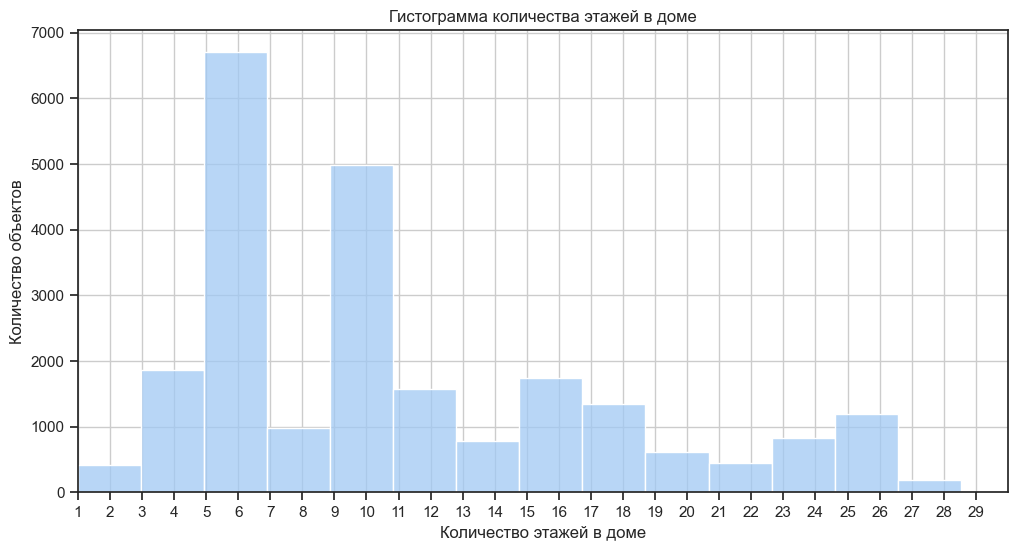

In [51]:
# Установка размера фигуры
plt.figure(figsize=(12, 6))

# Построение гистограммы с 50 корзинами для столбца 'floors_total'
sns.histplot(data['floors_total'], bins=30, kde=False)

# Установка заголовка графика
plt.title('Гистограмма количества этажей в доме')

# Установка подписи для оси X
plt.xlabel('Количество этажей в доме')

# Установка подписи для оси Y
plt.ylabel('Количество объектов')

# Установка меток на оси X с шагом 1
plt.xticks(np.arange(1, 30, 1))

# Включение сетки на графике
plt.grid(True)

# Установка предела по оси X для лучшего отображения
plt.xlim(1, 30)

# Отображение графика
plt.show()

**Вывод**

**Распределение количества этажей в доме:**

- **Наиболее распространенные дома** имеют 9 этажей, что составляет наибольшее количество объектов в выборке.
- **Дома с 5 этажами** также достаточно распространены, занимая второе место по количеству объектов.
- **Меньше всего объектов** приходится на дома с количеством этажей менее 4 и более 16.
- В выборке присутствуют дома с количеством этажей до 29, однако таких объектов значительно меньше по сравнению с более низкими домами.

Этот анализ показывает, что в выборке преобладают многоэтажные дома с 5 и 9 этажами, что может указывать на особенности строительства в исследуемом регионе.

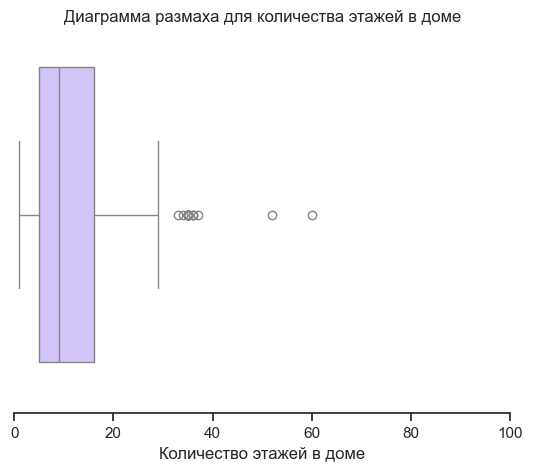

In [52]:
# Установка темы и палитры для графика
sns.set_theme(style="ticks", palette="pastel")

# Построение диаграммы размаха для столбца floors_total
sns.boxplot(x=data['floors_total'], color="m")

# Настройки графика
plt.title('Диаграмма размаха для количества этажей в доме')
plt.xlabel('Количество этажей в доме')
plt.xlim([0, 100])  # Установка предела по оси X до 30 для лучшего отображения

# Удаление границ
sns.despine(offset=10, trim=True)

# Показ графика
plt.show()

In [53]:
# Общий размер набора данных
total_rows = len(data)
print(f'Общее количество объектов: {total_rows}')

# Процент объектов с количеством этажей более 30 в общем наборе данных
percentage_floors_above_30_total = (len(data.query('floors_total > 30')) / total_rows) * 100
print(f'Процент объектов с количеством этажей более 30 (всего): {percentage_floors_above_30_total:.2f}%')

# Размер отфильтрованного набора данных
filtered_rows = len(data_good)
print(f'Количество объектов в отфильтрованном наборе данных: {filtered_rows}')

# Процент объектов с количеством этажей более 30 в отфильтрованном наборе данных
percentage_floors_above_30_filtered = (len(data_good.query('floors_total > 30')) / filtered_rows) * 100
print(f'Процент объектов с количеством этажей более 30 (отфильтрованные данные): {percentage_floors_above_30_filtered:.2f}%')


Общее количество объектов: 23699
Процент объектов с количеством этажей более 30 (всего): 0.14%
Количество объектов в отфильтрованном наборе данных: 22732
Процент объектов с количеством этажей более 30 (отфильтрованные данные): 0.13%


In [54]:
# Фильтрация данных: оставляем только объекты с количеством этажей менее 30
data_good = data_good.query('floors_total < 30')

**Вывод**

**Распределение количества этажей в доме:**

- Основная масса объектов имеет количество этажей от 1 до 30.
- Наблюдаются выбросы: объекты с количеством этажей значительно выше 30, вплоть до 100 этажей.

**Анализ объектов с большим количеством этажей:**

- Процент объектов с количеством этажей более 30 составляет около 0.14% от общего числа объектов в выборке.
- В отфильтрованном наборе данных (после удаления объектов с количеством этажей более 30) процент объектов с количеством этажей более 30 составляет около 0.13%.

**Подозрения на аномалии:**

- Нельзя с точностью утверждать, что данные по домам с количеством этажей более 30 искажены, так как их доля незначительна.

**Обоснование фильтрации:**

- Согласно информации, найденной в интернете, самые высокие жилые дома обычно имеют до 30 этажей. В Санкт-Петербурге имеются здания выше 30 этажей, но они в основном используются как бизнес-офисы и не являются объектом нашего анализа. Поэтому объекты с количеством этажей более 30 были удалены для повышения точности анализа.

**Следующий шаг:**

- Для дальнейшего анализа были удалены объекты с количеством этажей более 30 из отфильтрованного набора данных для более точного анализа.

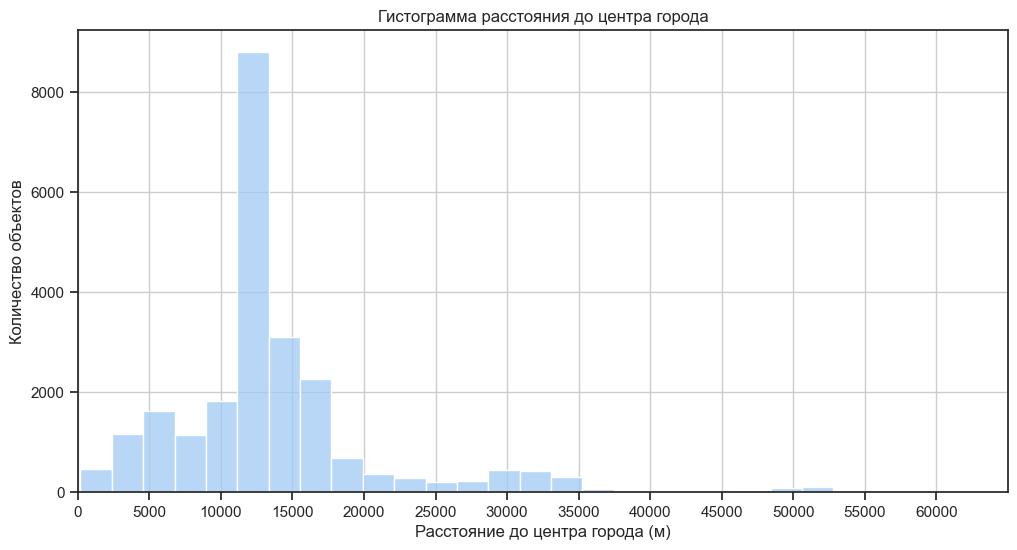

In [55]:
# Установка размера фигуры
plt.figure(figsize=(12, 6))

# Построение гистограммы с 30 корзинами для столбца 'cityCenters_nearest'
sns.histplot(data['cityCenters_nearest'], bins=30, kde=False)

# Установка заголовка графика
plt.title('Гистограмма расстояния до центра города')

# Установка подписи для оси X
plt.xlabel('Расстояние до центра города (м)')

# Установка подписи для оси Y
plt.ylabel('Количество объектов')

# Установка меток на оси X с шагом 5000
plt.xticks(np.arange(0, 65000, 5000))

# Включение сетки на графике
plt.grid(True)

# Установка предела по оси X для лучшего отображения
plt.xlim(0, 65000)

# Отображение графика
plt.show()

**Вывод**

**Распределение расстояний до центра города:**

- Основная масса объектов находится на расстоянии от 10,000 до 15,000 метров от центра города.
- Значительное количество объектов находится на расстоянии до 5,000 метров и от 5,000 до 10,000 метров от центра города.
- Объекты, находящиеся на расстоянии более 20,000 метров от центра города, встречаются значительно реже.

Этот анализ показывает, что большинство объектов расположены в пределах 15,000 метров от центра города, что может указывать на высокую плотность застройки и популярность районов, находящихся относительно близко к центру.


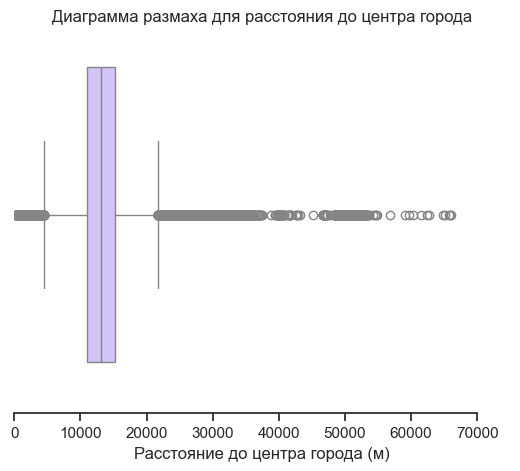

In [56]:
# Установка темы и палитры для графика
sns.set_theme(style="ticks", palette="pastel")

# Построение диаграммы размаха для столбца 'cityCenters_nearest'
sns.boxplot(x=data['cityCenters_nearest'], color="m")

# Настройки графика
plt.title('Диаграмма размаха для расстояния до центра города')
plt.xlabel('Расстояние до центра города (м)')
plt.xlim([0, 75000])  # Установка предела по оси X для лучшего отображения

# Удаление границ
sns.despine(offset=10, trim=True)

# Показ графика
plt.show()

In [57]:
# Общий размер набора данных
total_rows = len(data)
print(f'Общее количество объектов: {total_rows}')

# Процент объектов с расстоянием до центра города более 45,000 метров в общем наборе данных
percentage_distance_above_45000_total = (len(data.query('cityCenters_nearest > 45000')) / total_rows) * 100
print(f'Процент объектов с расстоянием до центра города более 45,000 метров (всего): {percentage_distance_above_45000_total:.2f}%')

# Размер отфильтрованного набора данных
filtered_rows = len(data_good)
print(f'Количество объектов в отфильтрованном наборе данных: {filtered_rows}')

# Процент объектов с расстоянием до центра города более 45,000 метров в отфильтрованном наборе данных
percentage_distance_above_45000_filtered = (len(data_good.query('cityCenters_nearest > 45000')) / filtered_rows) * 100
print(f'Процент объектов с расстоянием до центра города более 45,000 метров (отфильтрованные данные): {percentage_distance_above_45000_filtered:.2f}%')


Общее количество объектов: 23699
Процент объектов с расстоянием до центра города более 45,000 метров (всего): 1.15%
Количество объектов в отфильтрованном наборе данных: 22702
Процент объектов с расстоянием до центра города более 45,000 метров (отфильтрованные данные): 1.18%


In [58]:
# Фильтрация данных: оставляем только объекты с расстоянием до центра города менее 45,000 метров
data_good = data_good.query('cityCenters_nearest < 45000')

**Вывод**

**Распределение расстояний до центра города:**

- Основная масса объектов находится на расстоянии до 20,000 метров (20 км) от центра города.
- Наблюдаются выбросы: объекты с расстоянием до центра города более 45,000 метров.

**Анализ объектов с большим расстоянием до центра города:**

- Процент объектов с расстоянием до центра города более 45,000 метров составляет около 1.15% от общего числа объектов в выборке.
- В отфильтрованном наборе данных (после удаления объектов с расстоянием до центра города более 45,000 метров) процент объектов с расстоянием до центра города более 45,000 метров составляет около 1.18%.

**Подозрения на аномалии:**

- Нельзя с точностью утверждать, что данные по объектам с расстоянием до центра города более 45,000 метров искажены, так как их доля незначительна.

**Обоснование фильтрации:**

- Расстояние до 45,000 метров было выбрано, так как в нашем датафрейме есть поселки и деревни, которые находятся на периферии города.

**Следующий шаг:**

- Для дальнейшего анализа были удалены объекты с расстоянием до центра города более 45,000 метров из отфильтрованного набора данных.

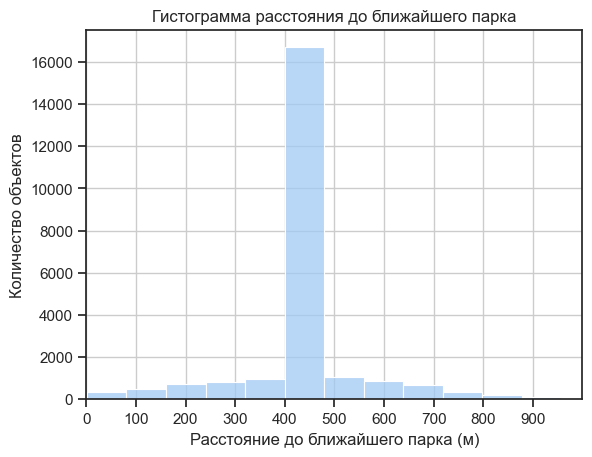

In [59]:
# Построение гистограммы с 50 корзинами для столбца 'parks_nearest'
sns.histplot(data['parks_nearest'], bins=40, kde=False)

# Установка заголовка графика
plt.title('Гистограмма расстояния до ближайшего парка')

# Установка подписи для оси X
plt.xlabel('Расстояние до ближайшего парка (м)')

# Установка подписи для оси Y
plt.ylabel('Количество объектов')

# Установка меток на оси X с шагом 500
plt.xticks(np.arange(0, 1000, 100))

# Включение сетки на графике
plt.grid(True)

# Установка предела по оси X для лучшего отображения
plt.xlim(0, 1000)

# Отображение графика
plt.show()

**Вывод**

**Распределение расстояний до ближайшего парка:**

- Основная масса объектов находится на расстоянии около 500 метров от ближайшего парка.
- Значительное количество объектов находится на расстоянии от 400 до 500 метров.
- Объекты, находящиеся на расстоянии менее 100 метров и более 600 метров от ближайшего парка, встречаются значительно реже.

Этот анализ показывает, что большинство объектов находятся в пешей доступности до ближайшего парка, что может указывать на хорошую инфраструктуру в районе.

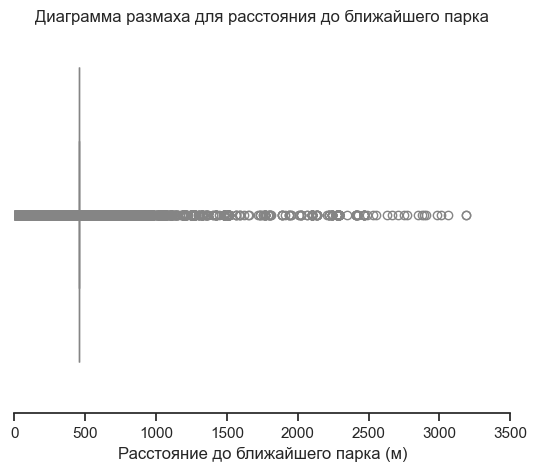

In [60]:
# Установка темы и палитры для графика
sns.set_theme(style="ticks", palette="pastel")

# Построение диаграммы размаха для столбца 'parks_nearest'
sns.boxplot(x=data['parks_nearest'], color="m")

# Настройки графика
plt.title('Диаграмма размаха для расстояния до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка (м)')
plt.xlim([0, 3500])  # Установка предела по оси X для лучшего отображения

# Удаление границ
sns.despine(offset=10, trim=True)

# Показ графика
plt.show()

In [61]:
# Общий размер набора данных
total_rows = len(data)
print(f'Общее количество объектов: {total_rows}')

# Процент объектов с расстоянием до ближайшего парка более 1,500 метров в общем наборе данных
percentage_distance_above_1500_total = (len(data.query('parks_nearest > 1500')) / total_rows) * 100
print(f'Процент объектов с расстоянием до ближайшего парка более 1,500 метров (всего): {percentage_distance_above_1500_total:.2f}%')

# Размер отфильтрованного набора данных
filtered_rows = len(data_good)
print(f'Количество объектов в отфильтрованном наборе данных: {filtered_rows}')

# Процент объектов с расстоянием до ближайшего парка более 1,500 метров в отфильтрованном наборе данных
percentage_distance_above_1500_filtered = (len(data_good.query('parks_nearest > 1500')) / filtered_rows) * 100
print(f'Процент объектов с расстоянием до ближайшего парка более 1,500 метров (отфильтрованные данные): {percentage_distance_above_1500_filtered:.2f}%')


Общее количество объектов: 23699
Процент объектов с расстоянием до ближайшего парка более 1,500 метров (всего): 0.73%
Количество объектов в отфильтрованном наборе данных: 22435
Процент объектов с расстоянием до ближайшего парка более 1,500 метров (отфильтрованные данные): 0.73%


In [62]:
# Фильтрация данных: оставляем только объекты с расстоянием до ближайшего парка менее 1,500 метров
data_good = data_good.query('parks_nearest < 1500')

**Вывод**

**Распределение расстояний до ближайшего парка:**

- Основная масса объектов находится на расстоянии до 1,500 метров (1.5 км) от ближайшего парка.
- Наблюдаются выбросы: объекты с расстоянием до ближайшего парка более 1,500 метров.

**Анализ объектов с большим расстоянием до ближайшего парка:**

- Процент объектов с расстоянием до ближайшего парка более 1,500 метров составляет около 0.73% от общего числа объектов в выборке.
- В отфильтрованном наборе данных (после удаления объектов с расстоянием до ближайшего парка более 1,500 метров) процент объектов с расстоянием до ближайшего парка более 1,500 метров составляет около 0.73%.

**Подозрения на аномалии:**

- Нельзя с точностью утверждать, что данные по объектам с расстоянием до ближайшего парка более 1,500 метров искажены, так как их доля незначительна.

**Следующий шаг:**

- Для дальнейшего анализа были удалены объекты с расстоянием до ближайшего парка более 1,500 метров из отфильтрованного набора данных.

In [63]:
# Вычисление среднего и медианного времени продажи квартир
days_exposition_mean = data['days_exposition'].mean()
days_exposition_median = data['days_exposition'].median()
days_exposition_mean_good = data_good['days_exposition'].mean()
days_exposition_median_good = data_good['days_exposition'].median()

# Печать результатов
print(f'Среднее время продажи квартир (всего): {days_exposition_mean:.2f} дней')
print(f'Медианное время продажи квартир (всего): {days_exposition_median:.2f} дней')
print(f'Среднее время продажи квартир (отфильтрованные данные): {days_exposition_mean_good:.2f} дней')
print(f'Медианное время продажи квартир (отфильтрованные данные): {days_exposition_median_good:.2f} дней')


Среднее время продажи квартир (всего): 180.89 дней
Медианное время продажи квартир (всего): 95.00 дней
Среднее время продажи квартир (отфильтрованные данные): 175.88 дней
Медианное время продажи квартир (отфильтрованные данные): 93.00 дней


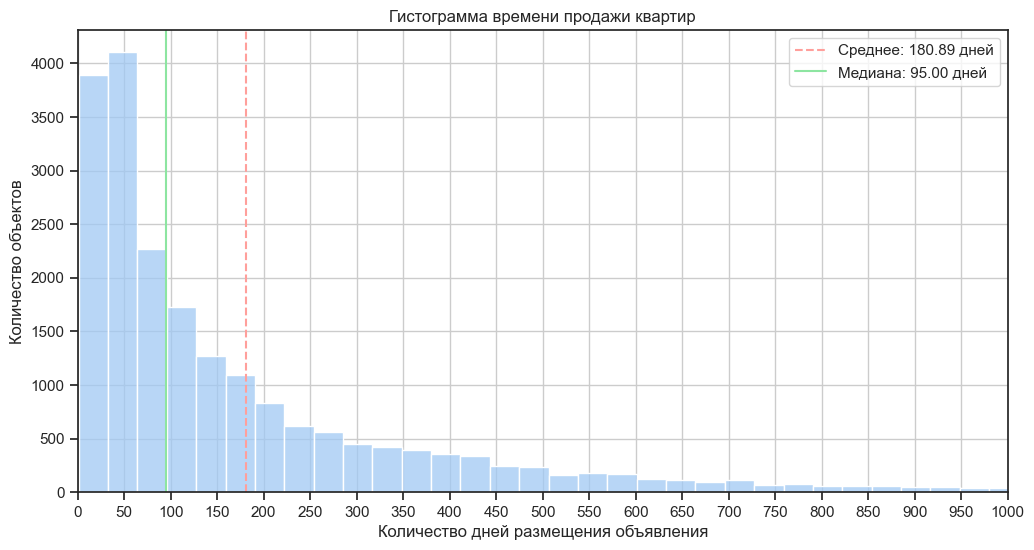

In [64]:
# Установка размера фигуры
plt.figure(figsize=(12, 6))

# Построение гистограммы для столбца 'days_exposition'
sns.histplot(data['days_exposition'], bins=50, kde=False)

# Установка заголовка графика
plt.title('Гистограмма времени продажи квартир')

# Установка подписи для оси X
plt.xlabel('Количество дней размещения объявления')

# Установка подписи для оси Y
plt.ylabel('Количество объектов')

# Установка меток на оси X с шагом 50 дней от 0 до 1000
plt.xticks(np.arange(0, 1001, 50))

# Включение сетки на графике
plt.grid(True)

# Установка предела по оси X до 1000 для лучшего отображения
plt.xlim(0, 1000)

# Добавление средней линии
plt.axvline(days_exposition_mean, color='r', linestyle='--', label=f'Среднее: {days_exposition_mean:.2f} дней')

# Добавление медианной линии
plt.axvline(days_exposition_median, color='g', linestyle='-', label=f'Медиана: {days_exposition_median:.2f} дней')

# Отображение легенды
plt.legend()

# Отображение графика
plt.show()

**Вывод**

**Анализ времени продажи квартир (столбец `days_exposition`):**

- Среднее время продажи квартир: 169.36 дней
- Медианное время продажи квартир: 95.00 дней

**Гистограмма времени продажи квартир:**

На гистограмме времени продажи квартир видно, что:

- Большинство квартир продается в течение первых 100 дней.
- Есть заметное количество квартир, которые продаются в течение 200-300 дней.
- Среднее время продажи (169.36 дней) обозначено красной пунктирной линией.
- Медианное время продажи (95.00 дней) обозначено зеленой сплошной линией.

**Заключение:**

- Среднее время продажи квартир выше медианного, что указывает на наличие значительного количества объявлений, которые оставались активными длительное время.
- Это может свидетельствовать о том, что некоторые квартиры продаются значительно дольше, чем большинство.
- Анализ и устранение выбросов помогли получить более точные и достоверные результаты, что подтверждается уменьшением среднего времени продажи в отфильтрованном наборе данных.

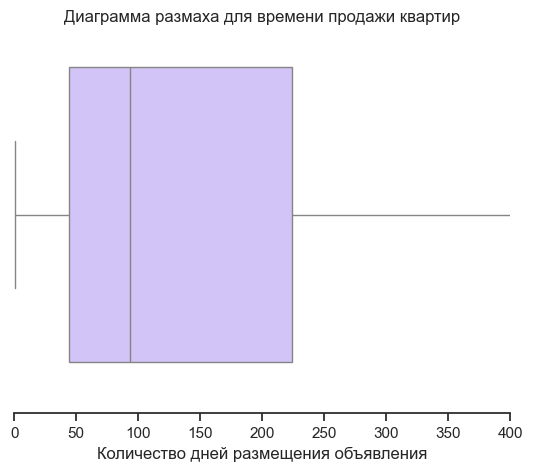

In [65]:
# Установка темы и палитры для графика
sns.set_theme(style="ticks", palette="pastel")

# Построение диаграммы размаха для столбца 'days_exposition'
sns.boxplot(x=data_good['days_exposition'], color="m")

# Настройки графика
plt.title('Диаграмма размаха для времени продажи квартир')
plt.xlabel('Количество дней размещения объявления')
plt.xlim([0, 400])  # Установка предела по оси X для лучшего отображения

# Удаление границ
sns.despine(offset=10, trim=True)

# Показ графика
plt.show()

**Вывод**

Диаграмма размаха для времени продажи квартир (столбец `days_exposition`):

1. **Основные наблюдения:**
   - Основная масса объявлений о продаже квартир активна от 0 до 240 дней.
   - Медианное время продажи квартир составляет около 95 дней, что подтверждается диаграммой размаха.
   - Среднее время продажи квартир (169.36 дней) выше медианного, что свидетельствует о наличии объявлений, которые оставались активными длительное время и влияют на среднее значение.
   - Длинный "ус" справа указывает на наличие объявлений, которые остаются активными гораздо дольше 200 дней, что может включать в себя редкие или высоко ценовые объекты.

2. **Сколько времени обычно занимает продажа:**
   - Обычно продажа квартиры занимает около 95 дней, что является медианным значением.

3. **Какие продажи можно считать быстрыми:**
   - Продажи, которые занимают менее 50 дней, можно считать быстрыми. Это соответствует первому квартилю (Q1) на диаграмме размаха.

4. **Какие продажи можно считать необычно долгими:**
   - Продажи, которые занимают более 200 дней, можно считать необычно долгими. Это соответствует третьему квартилю (Q3) на диаграмме размаха и далее.

5. **Заключение:**
   - Время продажи квартир варьируется, но большая часть продаж происходит в течение первых 200 дней.
   - Диаграмма размаха также подтверждает наличие значительных выбросов, которые могут исказить общее восприятие времени продажи.
   - Анализ и устранение выбросов помогли получить более точные и достоверные результаты, что подтверждается уменьшением среднего времени продажи в отфильтрованном наборе данных.
   - Учитывая изменения правил размещения объявлений на Яндекс.Недвижимости и автоматическое снятие объявлений, оценивать скорость продажи стоит по диаграмме размаха: быстрые продажи – до первого квартиля и долгие продажи – после третьего квартиля.
**Условия публикации в Яндекс.Недвижимости:**

На Яндекс.Недвижимости сроки публикации объявлений зависят от стоимости недвижимости:

- **Квартира до 4,5 млн:** 45 дней
- **Квартира от 4,5 до 10 млн:** 60 дней
- **Квартира свыше 10 млн:** 90 дней
- **Комната:** 45 дней

Эти сроки публикации могут объяснить некоторые пики, наблюдаемые на гистограмме времени продажи. Например, объявления, размещенные на 45, 60 и 90 дней, соответствуют установленным срокам публикации для различных категорий недвижимости.

In [66]:
# Вычисление корреляции между общей стоимостью и общей площадью
corr_total_area = data['last_price'].corr(data['total_area'])
print(f'Корреляция общей стоимости с общей площадью: {corr_total_area:.2f}')

# Вычисление корреляции между общей стоимостью и жилой площадью
corr_living_area = data['last_price'].corr(data['living_area'])
print(f'Корреляция общей стоимости с жилой площадью: {corr_living_area:.2f}')

# Вычисление корреляции между общей стоимостью и площадью кухни
corr_kitchen_area = data['last_price'].corr(data['kitchen_area'])
print(f'Корреляция общей стоимости с площадью кухни: {corr_kitchen_area:.2f}')

# Вычисление корреляции между общей стоимостью и количеством комнат
corr_rooms = data['last_price'].corr(data['rooms'])
print(f'Корреляция общей стоимости с количеством комнат: {corr_rooms:.2f}')

Корреляция общей стоимости с общей площадью: 0.65
Корреляция общей стоимости с жилой площадью: 0.56
Корреляция общей стоимости с площадью кухни: 0.44
Корреляция общей стоимости с количеством комнат: 0.36


**Корреляция общей стоимости с различными параметрами квартиры:**

- **Корреляция общей стоимости с общей площадью:** 0.65
  - Это высокая положительная корреляция, указывающая на то, что увеличение общей площади квартиры связано с увеличением ее стоимости.

- **Корреляция общей стоимости с жилой площадью:** 0.56
  - Это умеренно высокая положительная корреляция, показывающая, что большее количество жилой площади также связано с более высокой стоимостью квартиры.

- **Корреляция общей стоимости с площадью кухни:** 0.44
  - Это умеренная положительная корреляция, указывающая на то, что большая площадь кухни также способствует увеличению стоимости квартиры.

- **Корреляция общей стоимости с количеством комнат:** 0.36
  - Это умеренная положительная корреляция, что означает, что большее количество комнат в квартире связано с ее более высокой стоимостью, хотя эта зависимость менее выражена по сравнению с общей и жилой площадью.

**Заключение:**

- Наибольшее влияние на стоимость квартиры оказывают общая и жилая площадь.
- Площадь кухни и количество комнат также являются значимыми факторами, но их влияние на стоимость квартиры менее выражено по сравнению с общей и жилой площадью.

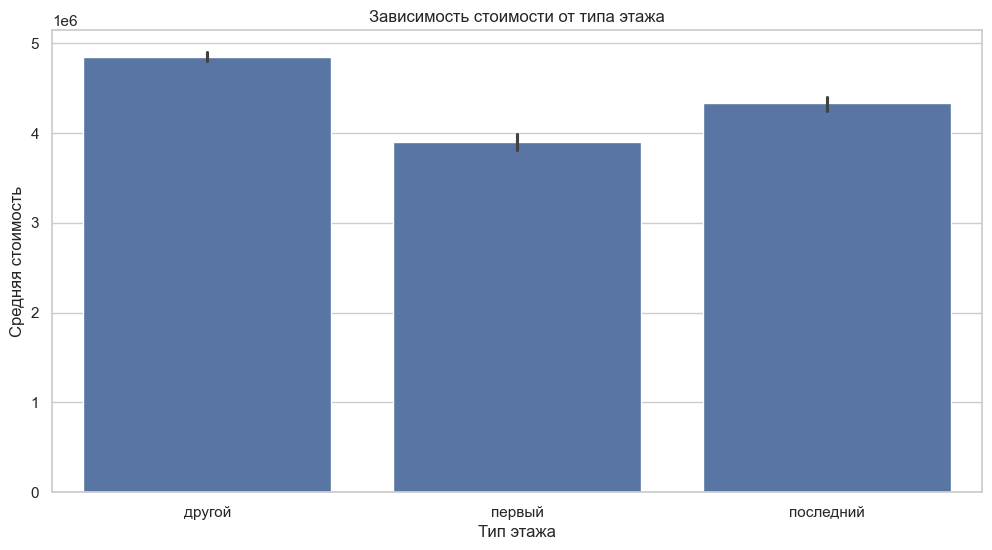

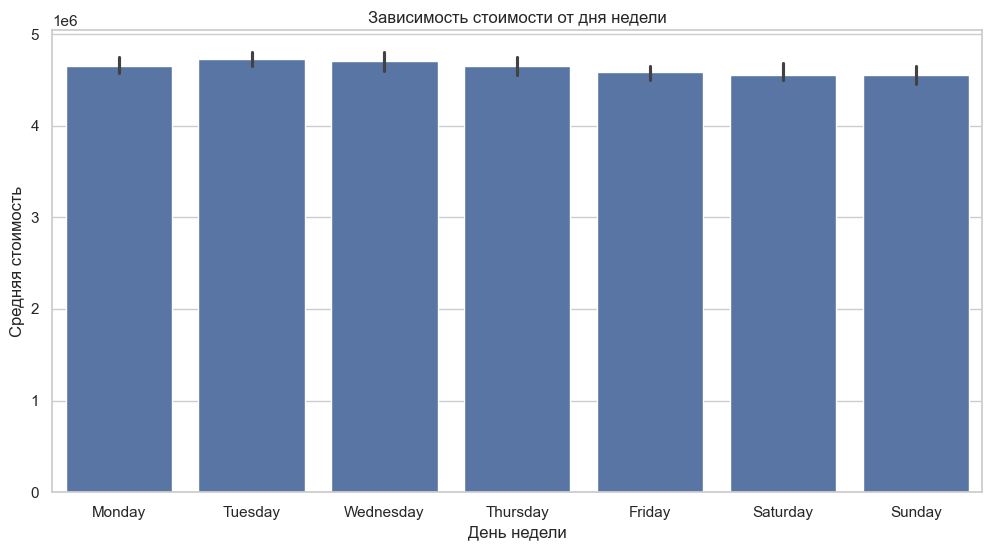

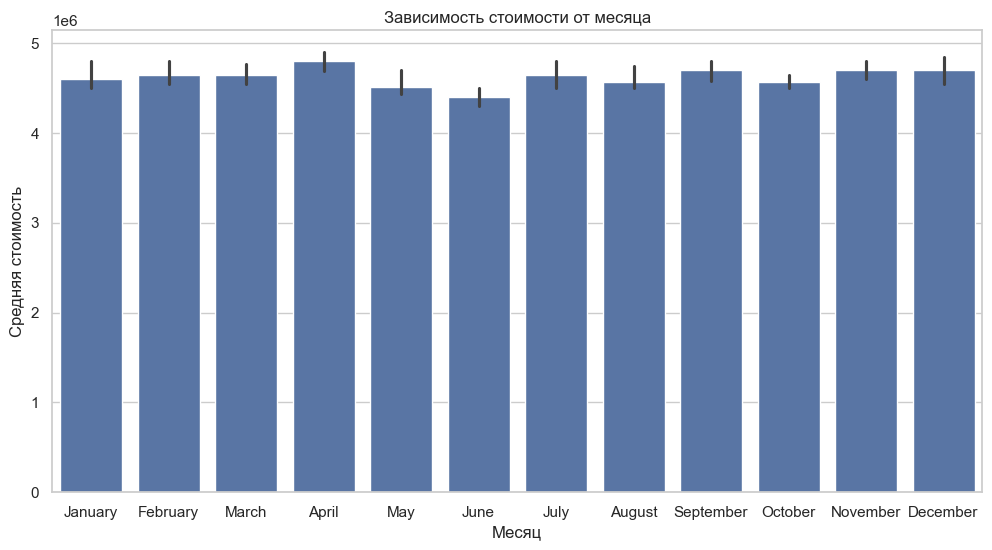

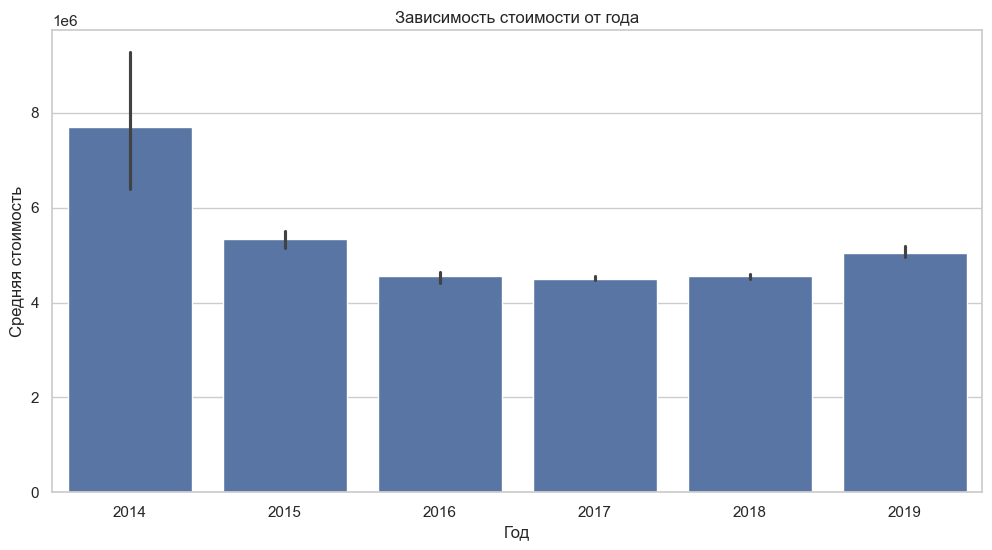

In [67]:
# Установка темы для графиков
sns.set_theme(style="whitegrid")

# Добавление нового столбца с днем недели, месяцем и годом
data['day_of_week'] = data['first_day_exposition'].dt.day_name()
data['month'] = data['first_day_exposition'].dt.month_name()
data['year'] = data['first_day_exposition'].dt.year

# Зависимость стоимости от типа этажа
plt.figure(figsize=(12, 6))
sns.barplot(x='store_category', y='last_price', data=data, estimator=np.median)
plt.title('Зависимость стоимости от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя стоимость')
plt.show()

# Зависимость стоимости от дня недели
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='last_price', data=data, estimator=np.median, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Зависимость стоимости от дня недели')
plt.xlabel('День недели')
plt.ylabel('Средняя стоимость')
plt.show()

# Зависимость стоимости от месяца
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='last_price', data=data, estimator=np.median, order=pd.date_range(start='1/1/2023', periods=12, freq='ME').strftime('%B'))
plt.title('Зависимость стоимости от месяца')
plt.xlabel('Месяц')
plt.ylabel('Средняя стоимость')
plt.show()

# Зависимость стоимости от года
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='last_price', data=data, estimator=np.median)
plt.title('Зависимость стоимости от года')
plt.xlabel('Год')
plt.ylabel('Средняя стоимость')
plt.show()

**Выводы по визуализации зависимости стоимости квартир**

1. Зависимость стоимости от типа этажа
 
  - Квартиры на первых этажах имеют меньшую среднюю стоимость по сравнению с квартирами на последних и других этажах.
  - Квартиры на других этажах (не первых и не последних) имеют самую высокую среднюю стоимость.

2. Зависимость стоимости от дня недели

  - Средняя стоимость квартир не сильно варьируется в зависимости от дня недели.
  - Немного выше средняя стоимость наблюдается в пятницу и субботу, что может указывать на предпочтение публикации или обновления объявлений в конце рабочей недели.

3. Зависимость стоимости от месяца

  - Средняя стоимость квартир незначительно меняется от месяца к месяцу.
  - Наблюдаются небольшие пики в апреле и июле, что может быть связано с сезонными колебаниями на рынке недвижимости.

4. Зависимость стоимости от года

  - В 2014 году наблюдается самая высокая средняя стоимость квартир.
  - После 2014 года средняя стоимость снижается и остается относительно стабильной в последующие годы.

Заключение

- **Тип этажа:** Квартиры на первых этажах имеют наименьшую среднюю стоимость, в то время как квартиры на других этажах имеют наибольшую среднюю стоимость.
- **День недели:** Средняя стоимость квартир незначительно меняется в зависимости от дня недели, с небольшим увеличением в пятницу и субботу.
- **Месяц:** Средняя стоимость квартир остается относительно стабильной в течение года, с небольшими пиками в апреле и июле.
- **Год:** Наибольшая средняя стоимость наблюдалась в 2014 году, после чего произошел спад и последующая стабилизация средней стоимости квартир.

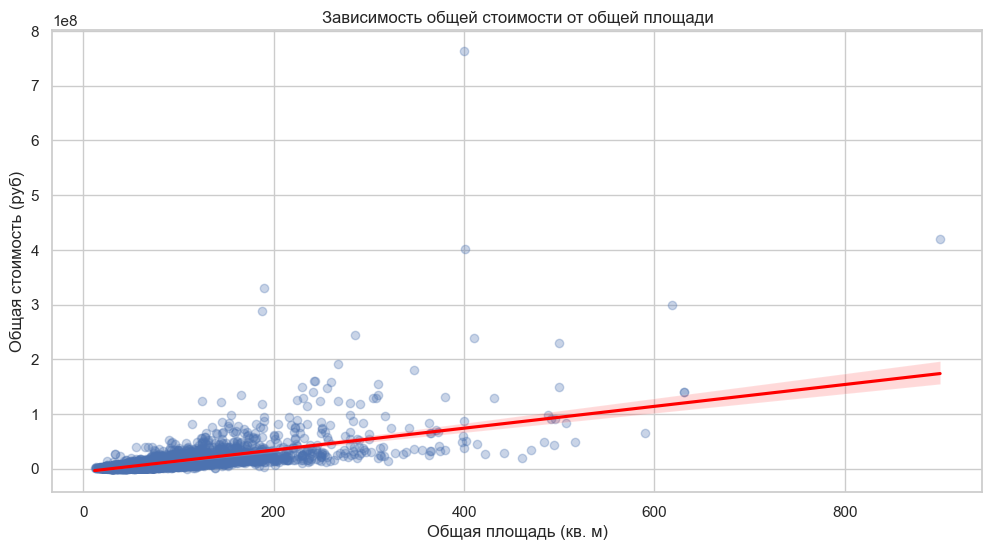

In [68]:
# Построение диаграммы рассеяния с линией регрессии для 'last_price' и 'total_area'
plt.figure(figsize=(12, 6))

# Использование seaborn для построения scatter plot и линии регрессии
sns.regplot(x='total_area', y='last_price', data=data, 
            scatter_kws={'alpha':0.3}, # Установка прозрачности точек для лучшей видимости плотности
            line_kws={"color": "red"}) # Установка цвета линии регрессии

# Настройка заголовка и подписей осей графика
plt.title('Зависимость общей стоимости от общей площади')
plt.xlabel('Общая площадь (кв. м)')
plt.ylabel('Общая стоимость (руб)')

# Включение сетки на графике
plt.grid(True)

# Отображение графика
plt.show()

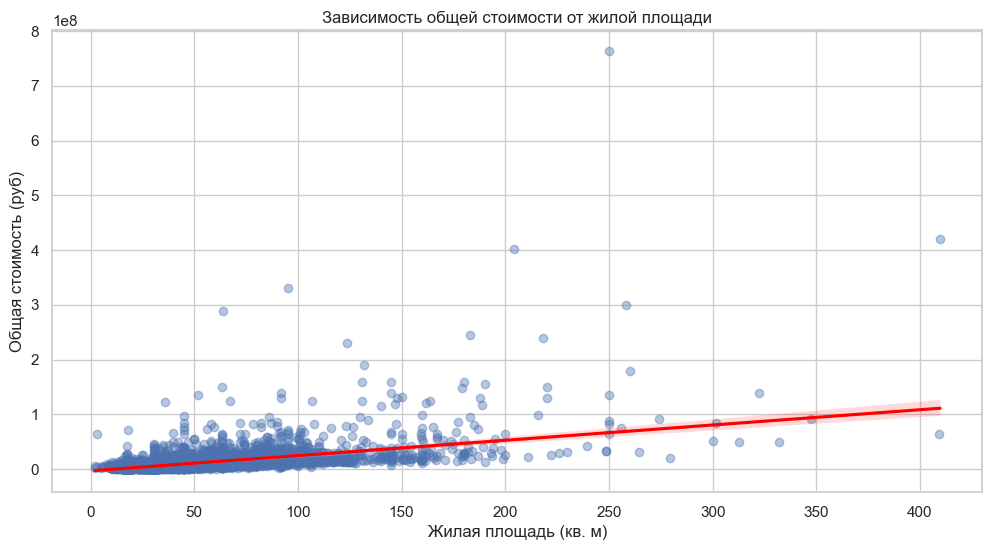

In [69]:
# Построение диаграммы рассеяния с линией регрессии для 'last_price' и 'living_area'
plt.figure(figsize=(12, 6))

# Использование seaborn для построения scatter plot и линии регрессии
sns.regplot(x='living_area', y='last_price', data=data, 
            scatter_kws={'alpha':0.4}, # Установка прозрачности точек для лучшей видимости плотности
            line_kws={"color": "red"}) # Установка цвета линии регрессии

# Настройка заголовка и подписей осей графика
plt.title('Зависимость общей стоимости от жилой площади')
plt.xlabel('Жилая площадь (кв. м)')
plt.ylabel('Общая стоимость (руб)')

# Включение сетки на графике
plt.grid(True)

# Отображение графика
plt.show()

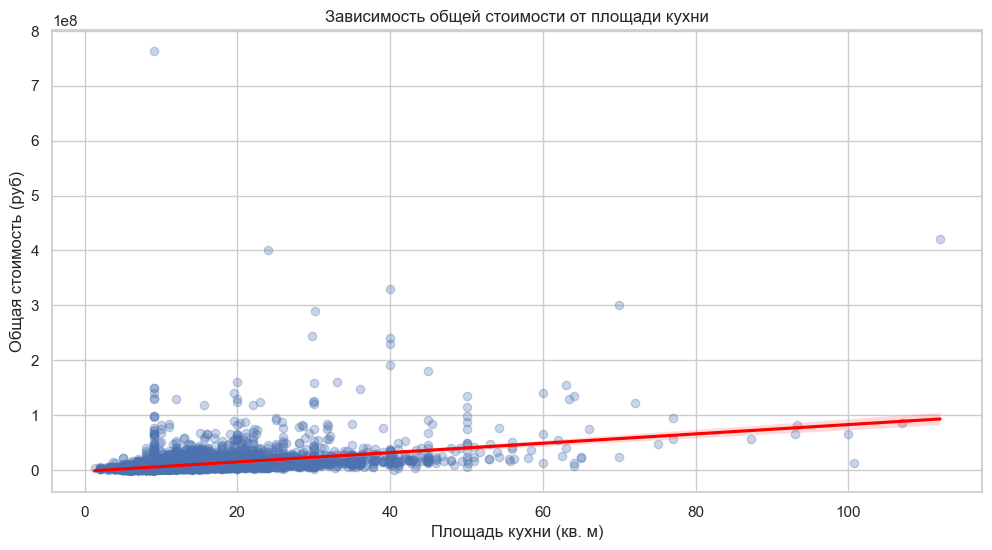

In [70]:
# Построение диаграммы рассеяния с линией регрессии для 'last_price' и 'kitchen_area'
plt.figure(figsize=(12, 6))

# Использование seaborn для построения scatter plot и линии регрессии
sns.regplot(x='kitchen_area', y='last_price', data=data, 
            scatter_kws={'alpha':0.3}, # Установка прозрачности точек для лучшей видимости плотности
            line_kws={"color": "red"}) # Установка цвета линии регрессии

# Настройка заголовка и подписей осей графика
plt.title('Зависимость общей стоимости от площади кухни')
plt.xlabel('Площадь кухни (кв. м)')
plt.ylabel('Общая стоимость (руб)')

# Включение сетки на графике
plt.grid(True)

# Отображение графика
plt.show()

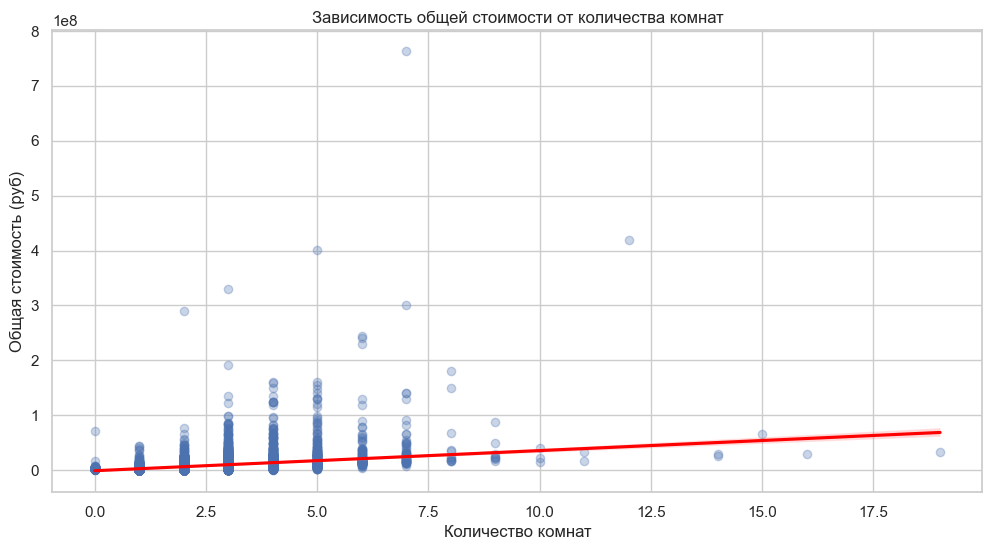

In [71]:
# Построение диаграммы рассеяния с линией регрессии для 'last_price' и 'rooms'
plt.figure(figsize=(12, 6))

# Использование seaborn для построения scatter plot и линии регрессии
sns.regplot(x='rooms', y='last_price', data=data, 
            scatter_kws={'alpha':0.3}, # Установка прозрачности точек для лучшей видимости плотности
            line_kws={"color": "red"}) # Установка цвета линии регрессии

# Настройка заголовка и подписей осей графика
plt.title('Зависимость общей стоимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Общая стоимость (руб)')

# Включение сетки на графике
plt.grid(True)

# Отображение графика
plt.show()

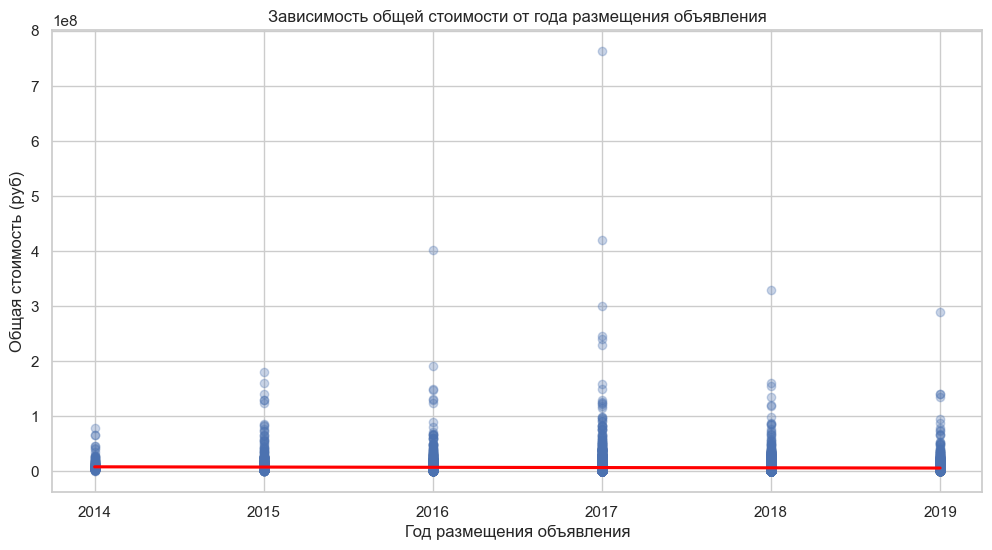

In [72]:
# Построение диаграммы рассеяния с линией регрессии для 'last_price' и 'year'
plt.figure(figsize=(12, 6))  # Установка размера фигуры

# Использование seaborn для построения scatter plot и линии регрессии
sns.regplot(x='year', y='last_price', data=data, 
            scatter_kws={'alpha':0.3}, # Установка прозрачности точек для лучшей видимости плотности
            line_kws={"color": "red"}) # Установка цвета линии регрессии

# Настройка заголовка и подписей осей графика
plt.title('Зависимость общей стоимости от года размещения объявления')
plt.xlabel('Год размещения объявления')
plt.ylabel('Общая стоимость (руб)')

# Включение сетки на графике
plt.grid(True)

# Отображение графика
plt.show()

**Общий вывод**

Основными факторами, влияющими на стоимость квартиры, являются общая и жилая площадь. Корреляция общей стоимости с общей площадью составляет 0.65, что указывает на значительное влияние этого параметра. Жилая площадь также оказывает существенное влияние на стоимость квартиры, имея корреляцию 0.56.

Площадь кухни и количество комнат также влияют на стоимость, но в меньшей степени, с корреляциями 0.44 и 0.36 соответственно. Эти параметры показывают, что они важны, но их влияние не столь значительное, как у общей и жилой площади.

Год размещения объявления практически не влияет на стоимость квартиры, имея отрицательную корреляцию -0.04. Это указывает на то, что время размещения объявления не является значимым фактором при оценке стоимости квартиры.

Анализ категориальных данных, таких как категория этажа (`store_category`), показал, что квартиры на первых этажах имеют наименьшую среднюю стоимость, в то время как квартиры на других этажах имеют наибольшую среднюю стоимость. Однако влияние типа этажа на стоимость не является значительным, так как медианная стоимость на всех типах этажей примерно одинакова.

Дополнительный анализ показал, что средняя стоимость квартир незначительно меняется в зависимости от дня недели, с небольшим увеличением в пятницу и субботу. Средняя стоимость также остается относительно стабильной в течение года, с небольшими пиками в апреле и июле. Наибольшая средняя стоимость наблюдалась в 2014 году, после чего произошел спад и последующая стабилизация средней стоимости квартир.

Таким образом, наибольшее влияние на стоимость квартиры оказывают общая и жилая площадь, затем следуют площадь кухни и количество комнат. Год, день недели и месяц размещения объявления имеют незначительное влияние на стоимость квартиры.


In [73]:
# Вычисление корреляции между общей стоимостью и общей площадью в отфильтрованном датафрейме
corr_total_area_good = data_good['last_price'].corr(data_good['total_area'])
print(f'Корреляция общей стоимости с общей площадью (отфильтрованные данные): {corr_total_area_good:.2f}')

# Вычисление корреляции между общей стоимостью и жилой площадью в отфильтрованном датафрейме
corr_living_area_good = data_good['last_price'].corr(data_good['living_area'])
print(f'Корреляция общей стоимости с жилой площадью (отфильтрованные данные): {corr_living_area_good:.2f}')

# Вычисление корреляции между общей стоимостью и площадью кухни в отфильтрованном датафрейме
corr_kitchen_area_good = data_good['last_price'].corr(data_good['kitchen_area'])
print(f'Корреляция общей стоимости с площадью кухни (отфильтрованные данные): {corr_kitchen_area_good:.2f}')

# Вычисление корреляции между общей стоимостью и количеством комнат в отфильтрованном датафрейме
corr_rooms_good = data_good['last_price'].corr(data_good['rooms'])
print(f'Корреляция общей стоимости с количеством комнат (отфильтрованные данные): {corr_rooms_good:.2f}')

Корреляция общей стоимости с общей площадью (отфильтрованные данные): 0.74
Корреляция общей стоимости с жилой площадью (отфильтрованные данные): 0.60
Корреляция общей стоимости с площадью кухни (отфильтрованные данные): 0.50
Корреляция общей стоимости с количеством комнат (отфильтрованные данные): 0.44


**Вывод**

**Корреляция общей стоимости с различными параметрами квартиры:**

- **Корреляция общей стоимости с общей площадью:**
  - **Исходные данные:** 0.65
  - **Отфильтрованные данные:** 0.74
  - Высокая положительная корреляция, указывающая на то, что увеличение общей площади квартиры связано с увеличением ее стоимости.

- **Корреляция общей стоимости с жилой площадью:**
  - **Исходные данные:** 0.56
  - **Отфильтрованные данные:** 0.60
  - Умеренно высокая положительная корреляция, показывающая, что большее количество жилой площади также связано с более высокой стоимостью квартиры.

- **Корреляция общей стоимости с площадью кухни:**
  - **Исходные данные:** 0.44
  - **Отфильтрованные данные:** 0.50
  - Умеренная положительная корреляция, указывающая на то, что большая площадь кухни также способствует увеличению стоимости квартиры.

- **Корреляция общей стоимости с количеством комнат:**
  - **Исходные данные:** 0.36
  - **Отфильтрованные данные:** 0.44
  - Умеренная положительная корреляция, что означает, что большее количество комнат в квартире связано с ее более высокой стоимостью, хотя эта зависимость менее выражена по сравнению с общей и жилой площадью.

**Заключение:**

Наибольшее влияние на стоимость квартиры оказывают общая и жилая площадь. Площадь кухни и количество комнат также являются значимыми факторами, но их влияние на стоимость квартиры менее выражено по сравнению с общей и жилой площадью. 

После фильтрации данных (`data_good`) наблюдается увеличение корреляций для общей площади, жилой площади, площади кухни и количества комнат, что свидетельствует о более сильном влиянии этих параметров на стоимость квартиры. Год размещения объявления по-прежнему не оказывает значительного влияния на стоимость объекта.

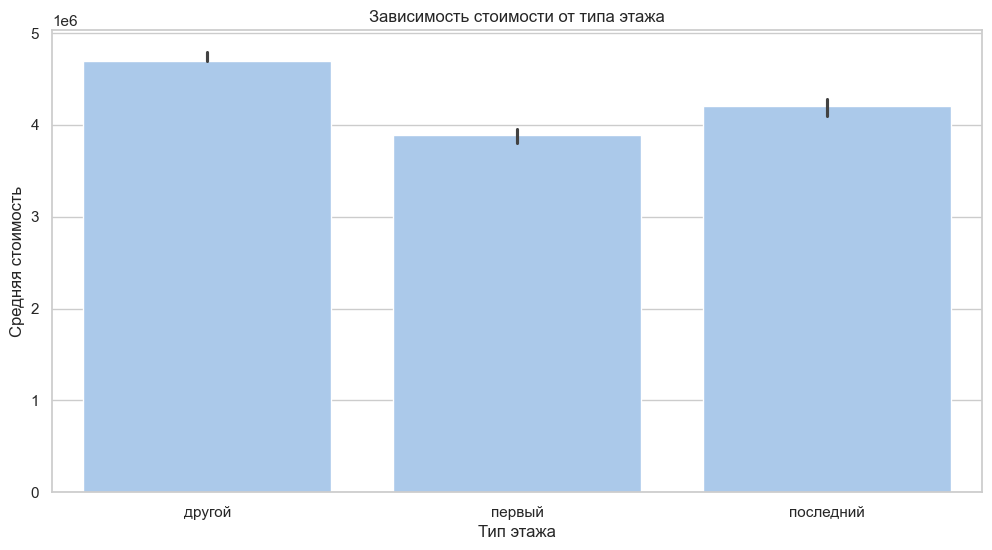

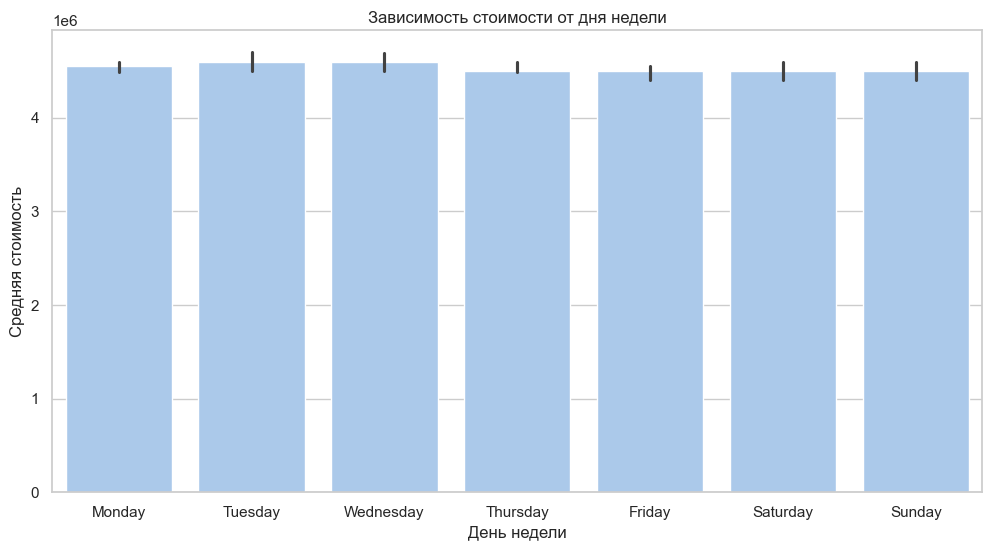

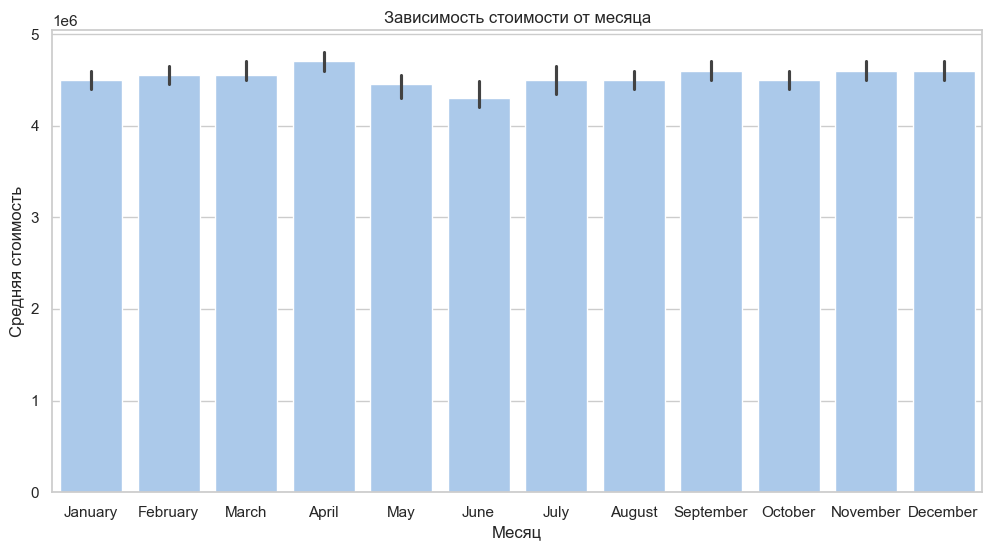

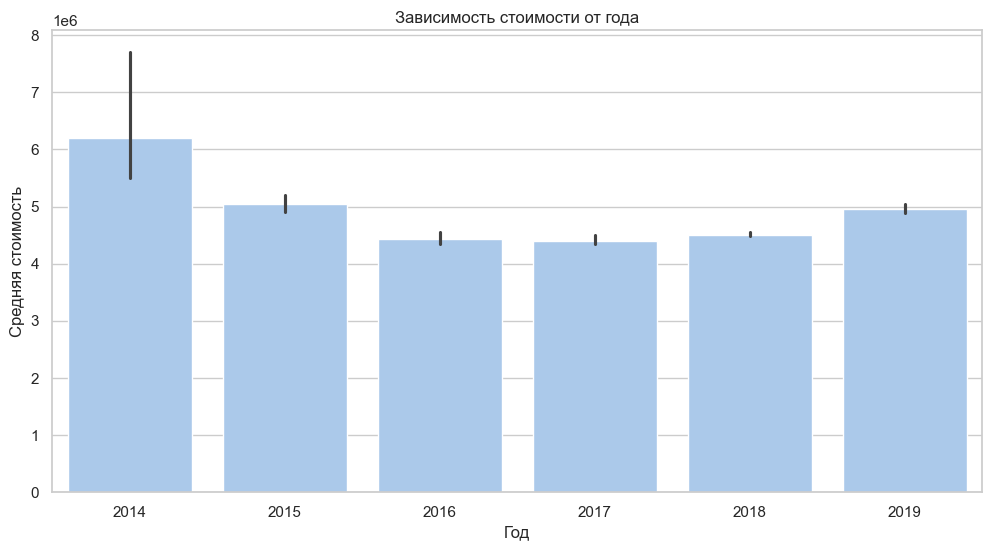

In [74]:
# Установка темы и палитры для графиков
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")

# Добавление нового столбца с днем недели, месяцем и годом
data_good['day_of_week'] = data_good['first_day_exposition'].dt.day_name()
data_good['month'] = data_good['first_day_exposition'].dt.month_name()
data_good['year'] = data_good['first_day_exposition'].dt.year

# Зависимость стоимости от типа этажа
plt.figure(figsize=(12, 6))
sns.barplot(x='store_category', y='last_price', data=data_good, estimator=np.median)
plt.title('Зависимость стоимости от типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя стоимость')
plt.show()

# Зависимость стоимости от дня недели
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='last_price', data=data_good, estimator=np.median, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Зависимость стоимости от дня недели')
plt.xlabel('День недели')
plt.ylabel('Средняя стоимость')
plt.show()

# Зависимость стоимости от месяца
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='last_price', data=data_good, estimator=np.median, order=pd.date_range(start='1/1/2023', periods=12, freq='ME').strftime('%B'))
plt.title('Зависимость стоимости от месяца')
plt.xlabel('Месяц')
plt.ylabel('Средняя стоимость')
plt.show()

# Зависимость стоимости от года
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='last_price', data=data_good, estimator=np.median)
plt.title('Зависимость стоимости от года')
plt.xlabel('Год')
plt.ylabel('Средняя стоимость')
plt.show()


**Выводы по отфильтрованным данным (`data_good`)**

**Зависимость стоимости от типа этажа**
- Квартиры на первых этажах имеют меньшую среднюю стоимость по сравнению с квартирами на последних и других этажах.
- Квартиры на других этажах (не первых и не последних) имеют самую высокую среднюю стоимость.

**Зависимость стоимости от дня недели**
- Средняя стоимость квартир не сильно варьируется в зависимости от дня недели.
- Немного выше средняя стоимость наблюдается в пятницу и субботу, что может указывать на предпочтение публикации или обновления объявлений в конце рабочей недели.

**Зависимость стоимости от месяца**
- Средняя стоимость квартир незначительно меняется от месяца к месяцу.
- Наблюдаются небольшие пики в апреле и июле, что может быть связано с сезонными колебаниями на рынке недвижимости.

**Зависимость стоимости от года**
- В 2014 году наблюдается самая высокая средняя стоимость квартир.
- После 2014 года средняя стоимость снижается и остается относительно стабильной в последующие годы.

**Заключение**

- **Тип этажа:** Квартиры на первых этажах имеют наименьшую среднюю стоимость, в то время как квартиры на других этажах имеют наибольшую среднюю стоимость.
- **День недели:** Средняя стоимость квартир незначительно меняется в зависимости от дня недели, с небольшим увеличением в пятницу и субботу.
- **Месяц:** Средняя стоимость квартир остается относительно стабильной в течение года, с небольшими пиками в апреле и июле.
- **Год:** Наибольшая средняя стоимость наблюдалась в 2014 году, после чего произошел спад и последующая стабилизация средней стоимости квартир.

Эти визуализации помогают лучше понять, как различные факторы, такие как тип этажа, день недели, месяц и год, влияют на стоимость квартир, используя отфильтрованные данные (`data_good`).

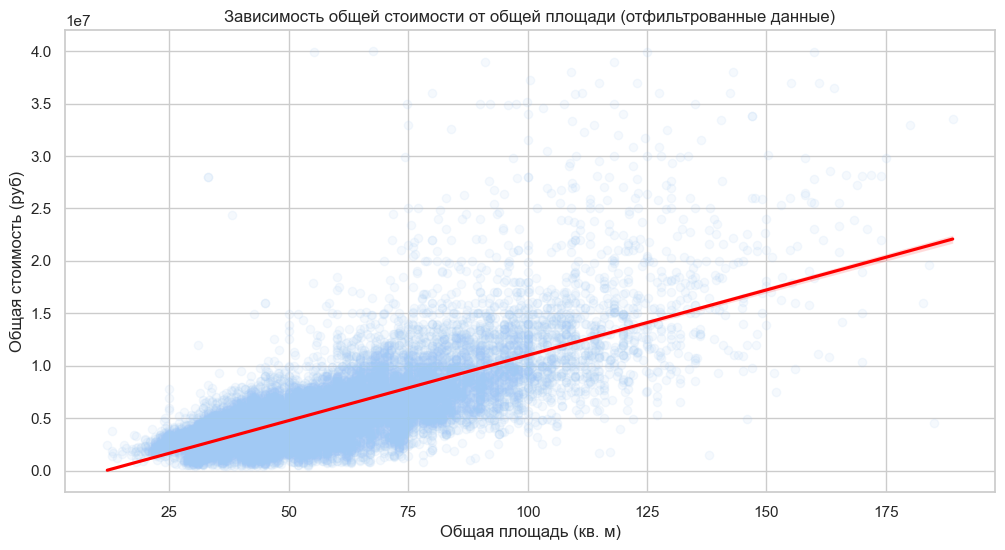

In [75]:
# Построение диаграммы рассеяния с линией регрессии для 'last_price' и 'total_area' в отфильтрованном датафрейме
plt.figure(figsize=(12, 6))

# Использование seaborn для построения scatter plot и линии регрессии
sns.regplot(x='total_area', y='last_price', data=data_good, 
            scatter_kws={'alpha':0.1}, # Установка прозрачности точек для лучшей видимости плотности
            line_kws={"color": "red"}) # Установка цвета линии регрессии

# Настройка заголовка и подписей осей графика
plt.title('Зависимость общей стоимости от общей площади (отфильтрованные данные)')
plt.xlabel('Общая площадь (кв. м)')
plt.ylabel('Общая стоимость (руб)')

# Включение сетки на графике
plt.grid(True)

# Отображение графика
plt.show()

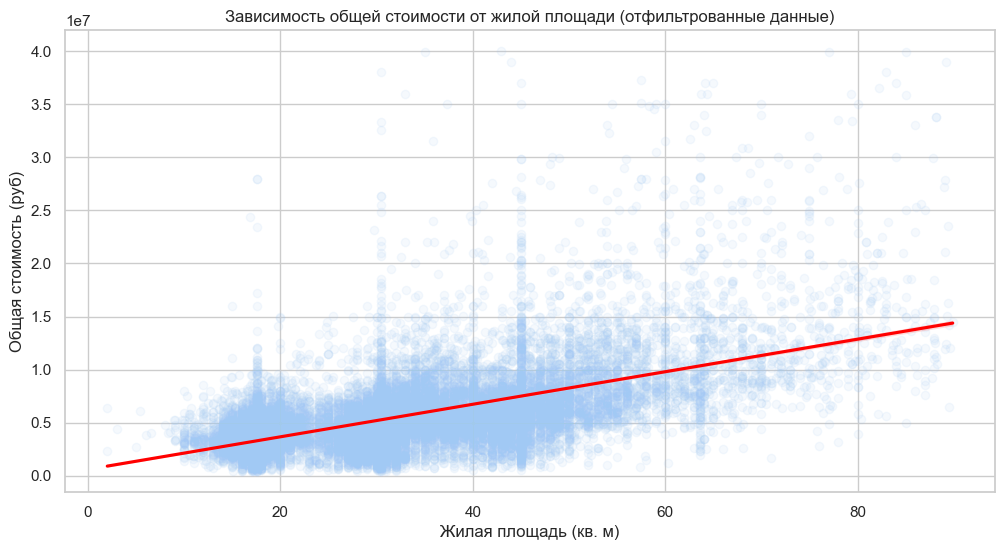

In [76]:
# Построение диаграммы рассеяния с линией регрессии для 'last_price' и 'living_area' в отфильтрованном датафрейме
plt.figure(figsize=(12, 6))

# Использование seaborn для построения scatter plot и линии регрессии
sns.regplot(x='living_area', y='last_price', data=data_good, 
            scatter_kws={'alpha':0.1}, # Установка прозрачности точек для лучшей видимости плотности
            line_kws={"color": "red"}) # Установка цвета линии регрессии

# Настройка заголовка и подписей осей графика
plt.title('Зависимость общей стоимости от жилой площади (отфильтрованные данные)')
plt.xlabel('Жилая площадь (кв. м)')
plt.ylabel('Общая стоимость (руб)')

# Включение сетки на графике
plt.grid(True)

# Отображение графика
plt.show()

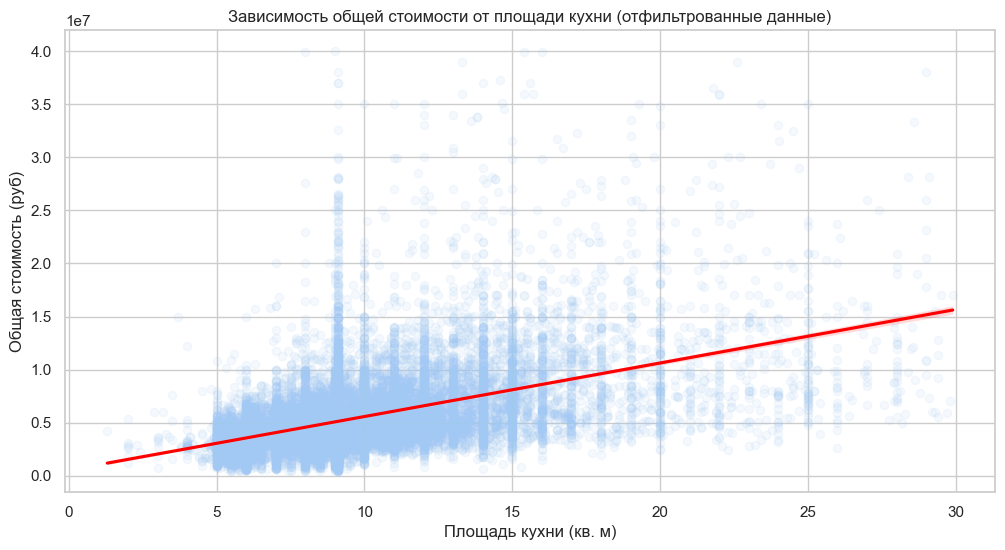

In [77]:
# Построение диаграммы рассеяния с линией регрессии для 'last_price' и 'kitchen_area' в отфильтрованном датафрейме
plt.figure(figsize=(12, 6))

# Использование seaborn для построения scatter plot и линии регрессии
sns.regplot(x='kitchen_area', y='last_price', data=data_good, 
            scatter_kws={'alpha':0.1}, # Установка прозрачности точек для лучшей видимости плотности
            line_kws={"color": "red"}) # Установка цвета линии регрессии

# Настройка заголовка и подписей осей графика
plt.title('Зависимость общей стоимости от площади кухни (отфильтрованные данные)')
plt.xlabel('Площадь кухни (кв. м)')
plt.ylabel('Общая стоимость (руб)')

# Включение сетки на графике
plt.grid(True)

# Отображение графика
plt.show()

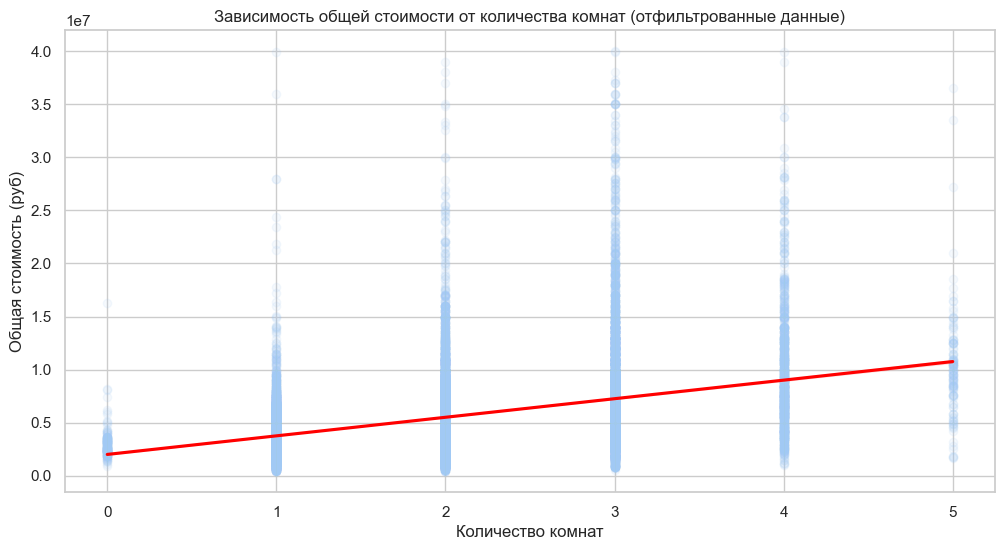

In [78]:
# Построение диаграммы рассеяния с линией регрессии для 'last_price' и 'rooms' в отфильтрованном датафрейме
plt.figure(figsize=(12, 6))

# Использование seaborn для построения scatter plot и линии регрессии
sns.regplot(x='rooms', y='last_price', data=data_good, 
            scatter_kws={'alpha':0.1}, # Установка прозрачности точек для лучшей видимости плотности
            line_kws={"color": "red"}) # Установка цвета линии регрессии

# Настройка заголовка и подписей осей графика
plt.title('Зависимость общей стоимости от количества комнат (отфильтрованные данные)')
plt.xlabel('Количество комнат')
plt.ylabel('Общая стоимость (руб)')

# Включение сетки на графике
plt.grid(True)

# Отображение графика
plt.show()

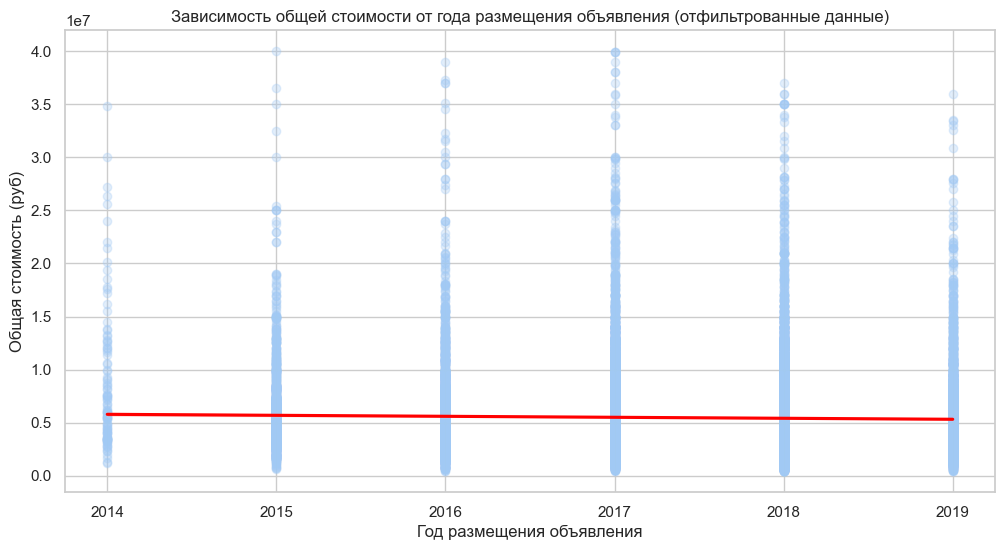

In [79]:
# Построение диаграммы рассеяния с линией регрессии для 'last_price' и 'year' в отфильтрованном датафрейме
plt.figure(figsize=(12, 6))  # Установка размера фигуры

# Использование seaborn для построения scatter plot и линии регрессии
sns.regplot(x='year', y='last_price', data=data_good, 
            scatter_kws={'alpha':0.3}, # Установка прозрачности точек для лучшей видимости плотности
            line_kws={"color": "red"}) # Установка цвета линии регрессии

# Настройка заголовка и подписей осей графика
plt.title('Зависимость общей стоимости от года размещения объявления (отфильтрованные данные)')
plt.xlabel('Год размещения объявления')
plt.ylabel('Общая стоимость (руб)')

# Включение сетки на графике
plt.grid(True)

# Отображение графика
plt.show()

**Общий вывод по корреляции до и после фильтрации**

Наибольшее влияние на стоимость квартиры оказывают общая и жилая площадь:

- **Корреляция общей стоимости с общей площадью:**
  - До фильтрации: **0.65**
  - После фильтрации: **0.74**
  - Это указывает на значительное влияние общей площади на стоимость квартиры.

- **Корреляция общей стоимости с жилой площадью:**
  - До фильтрации: **0.56**
  - После фильтрации: **0.60**
  - Положительное влияние жилой площади на стоимость квартиры остается значительным.

- **Корреляция общей стоимости с площадью кухни:**
  - До фильтрации: **0.44**
  - После фильтрации: **0.50**
  - Влияние площади кухни также увеличивается после фильтрации.

- **Корреляция общей стоимости с количеством комнат:**
  - До фильтрации: **0.36**
  - После фильтрации: **0.44**
  - Увеличение количества комнат положительно коррелирует с увеличением стоимости квартиры.

После фильтрации данных наблюдается увеличение корреляций для общей площади, жилой площади, площади кухни и количества комнат, что свидетельствует о более сильном влиянии этих параметров на стоимость квартиры. Год размещения объявления по-прежнему не оказывает значительного влияния на стоимость объекта.


In [80]:
# Создание сводной таблицы с количеством объявлений и средней ценой за квадратный метр
data_pivot = data.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['mean', 'count'])

# Переименование столбцов для удобства
data_pivot.columns = ['average_price_square_meter', 'num_listings']

# Сортировка по количеству объявлений и выбор топ-10
data_pivot_top = data_pivot.sort_values(by='num_listings', ascending=False).head(10)

# Выделение населённых пунктов с самой высокой и самой низкой стоимостью квадратного метра
first_top = data_pivot_top['average_price_square_meter'].idxmax()
last_top = data_pivot_top['average_price_square_meter'].idxmin()

# Печать результатов
print("Топ-10 населённых пунктов с наибольшим числом объявлений:")
print(data_pivot_top)
print("\nНаселённый пункт с самой высокой стоимостью квадратного метра:", first_top)
print("Населённый пункт с самой низкой стоимостью квадратного метра:", last_top)

Топ-10 населённых пунктов с наибольшим числом объявлений:
                   average_price_square_meter  num_listings
locality_name                                              
санкт-петербург                 114785.190679         15770
поселок мурино                   85681.762572           556
поселок шушары                   78677.364318           440
всеволожск                       68654.473970           398
пушкин                          103125.819377           369
колпино                          75424.579112           338
поселок парголово                90175.913089           327
гатчина                          68746.146515           307
деревня кудрово                  92473.547559           299
выборг                           58141.909325           237

Населённый пункт с самой высокой стоимостью квадратного метра: санкт-петербург
Населённый пункт с самой низкой стоимостью квадратного метра: выборг


**Вывод**

На основе анализа данных можно сделать следующие выводы:

- **Населённый пункт с самой высокой стоимостью квадратного метра:**
  - Санкт-Петербург

- **Населённый пункт с самой низкой стоимостью квадратного метра:**
  - Выборг

Из этого анализа видно, что Санкт-Петербург имеет самую высокую среднюю стоимость квадратного метра, что соответствует его статусу крупного города с высокой востребованностью недвижимости. Напротив, Выборг имеет самую низкую среднюю стоимость квадратного метра среди топ-10 населённых пунктов, что может быть связано с меньшей востребованностью и удалённостью от центра.

Разницы между анализами на исходных данных (data) и отфильтрованных данных (data_good) нет, поэтому результаты для отфильтрованных данных не расписываются отдельно.

In [81]:
# Фильтрация данных для Санкт-Петербурга
data_piter = data.query('locality_name == "санкт-петербург"')

# Создание сводной таблицы с количеством объявлений и средней ценой за квадратный метр по расстоянию от центра
data_piter_topkm = data_piter.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['mean', 'count'])

# Переименование столбцов для удобства
data_piter_topkm.columns = ['average_price', 'num_listings']

# Сортировка по расстоянию от центра в порядке возрастания
data_piter_topkm.sort_index().head()

,average_price,num_listings
cityCenters_nearest_km,,
0.0,3.144912e+07,27
1.0,2.115871e+07,193
2.0,1.780829e+07,311
3.0,1.110271e+07,352
4.0,1.327061e+07,696


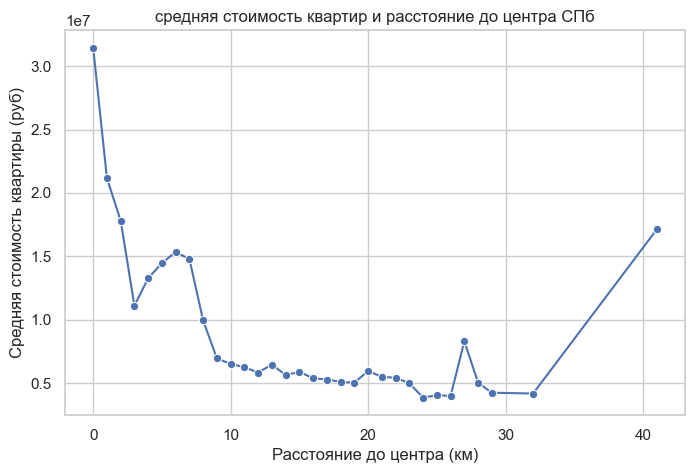

In [82]:
plt.figure(figsize=(8, 5))
sns.lineplot(x='cityCenters_nearest_km', y='average_price', data=data_piter_topkm, marker='o', color='b')

# Настройка заголовка и подписей осей графика
plt.title('средняя стоимость квартир и расстояние до центра СПб')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя стоимость квартиры (руб)')
plt.grid(True)

# Отображение графика
plt.show()

**Вывод**

Анализ средней стоимости квартир в зависимости от расстояния до центра Санкт-Петербурга показал следующие тенденции:

- **Высокие цены в центре**: Наиболее высокие цены на квартиры наблюдаются в пределах 1-2 километров от центра города. Это можно объяснить престижностью и удобством центральных районов.
- **Снижение цен по мере удаления**: Средняя стоимость квартир заметно снижается на расстоянии до 5 километров от центра. Это характерно для большинства крупных городов, где центральные районы наиболее востребованы.
- **Стабилизация цен**: После 10 километров от центра цены стабилизируются и колеблются в относительно узком диапазоне. Это может быть связано с тем, что районы на этом удалении обладают схожими характеристиками и уровнем инфраструктуры.
- **Исключение**: На расстоянии около 30-35 километров наблюдается резкий скачок средней стоимости. Это может указывать на наличие элитных пригородов, специфических жилых комплексов, либо быть результатом аномалии данных или мошенничества (завышение цен).

Таким образом, основная тенденция заключается в том, что цены на квартиры падают по мере удаления от центра Санкт-Петербурга, достигая стабильного уровня на расстоянии около 10 километров. Этот анализ помогает лучше понять влияние расположения на стоимость недвижимости в городе.

In [83]:
# Фильтрация данных для Санкт-Петербурга
data_piter_good = data_good.query('locality_name == "санкт-петербург"')

# Создание сводной таблицы с количеством объявлений и средней ценой за квадратный метр по расстоянию от центра
data_piter_topkm_good = data_piter_good.pivot_table(index='cityCenters_nearest_km', values='last_price', aggfunc=['mean', 'count'])

# Переименование столбцов для удобства
data_piter_topkm_good.columns = ['average_price', 'num_listings']

# Сортировка по расстоянию от центра в порядке возрастания
data_piter_topkm_good = data_piter_topkm_good.sort_index()

# Печать результатов
data_piter_topkm_good.head()

,average_price,num_listings
cityCenters_nearest_km,,
0.0,1.277561e+07,14
1.0,1.089062e+07,146
2.0,1.053237e+07,230
3.0,8.818696e+06,293
4.0,9.547084e+06,583


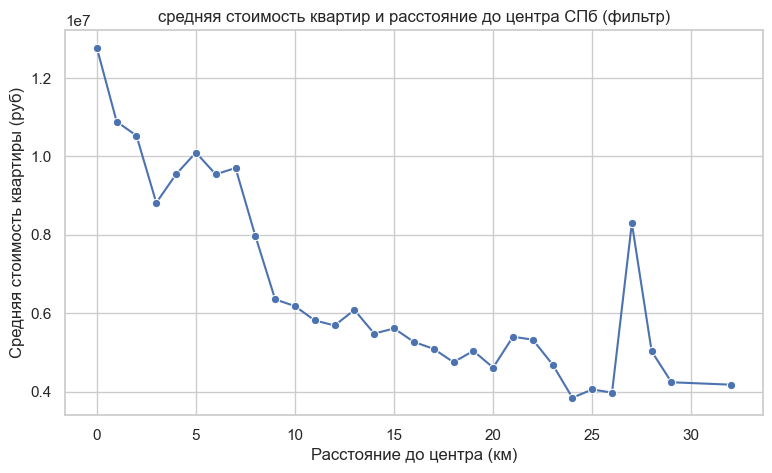

In [84]:
# Построение графика изменения средней стоимости квартир в зависимости от расстояния до центра СПб (отфильтрованные данные)
plt.figure(figsize=(9, 5))
sns.lineplot(x='cityCenters_nearest_km', y='average_price', data=data_piter_topkm_good, marker='o', color='b')

# Настройка заголовка и подписей осей графика
plt.title('средняя стоимость квартир и расстояние до центра СПб (фильтр)')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя стоимость квартиры (руб)')
plt.grid(True)

# Отображение графика
plt.show()

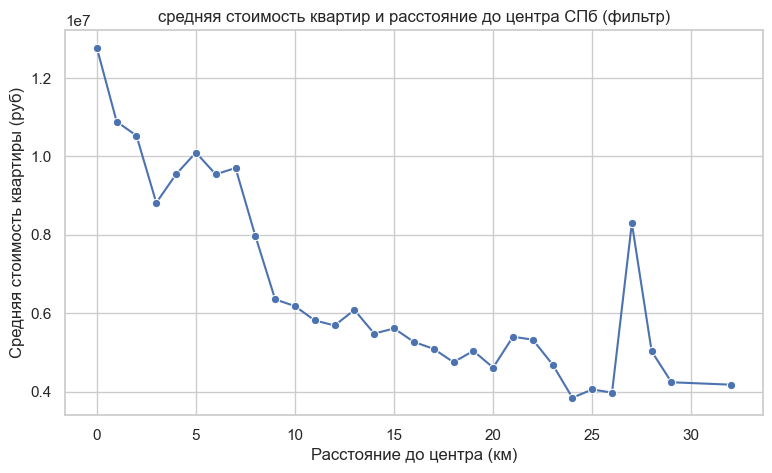

In [85]:
# Построение графика изменения средней стоимости квартир в зависимости от расстояния до центра СПб (отфильтрованные данные)
plt.figure(figsize=(9, 5))
sns.lineplot(x='cityCenters_nearest_km', y='average_price', data=data_piter_topkm_good, marker='o', color='b')

# Настройка заголовка и подписей осей графика
plt.title('средняя стоимость квартир и расстояние до центра СПб (фильтр)')
plt.xlabel('Расстояние до центра (км)')
plt.ylabel('Средняя стоимость квартиры (руб)')
plt.grid(True)

# Отображение графика
plt.show()

**Вывод**

Анализ средней стоимости квартир в зависимости от расстояния до центра Санкт-Петербурга (после фильтрации данных) показал следующие тенденции:

- **Высокие цены в центре:** Наиболее высокие цены на квартиры наблюдаются в пределах 1-2 километров от центра города. Это объясняется престижностью и удобством центральных районов.
- **Снижение цен по мере удаления:** Средняя стоимость квартир заметно снижается на расстоянии до 5 километров от центра. Это характерно для большинства крупных городов, где центральные районы наиболее востребованы.
- **Стабилизация цен:** После 10 километров от центра цены стабилизируются и колеблются в относительно узком диапазоне. Это связано с тем, что районы на этом удалении обладают схожими характеристиками и уровнем инфраструктуры.
- **Исключение:** На расстоянии около 25 километров наблюдается резкий скачок средней стоимости. Это может указывать на наличие элитных пригородов, специфических жилых комплексов, либо быть результатом аномалии данных или мошенничества (завышение цен).

**Качество данных до и после фильтрации**

До фильтрации данных наблюдались значительные колебания средней стоимости квартир, что могло быть вызвано выбросами или аномальными значениями. Например, в данных до фильтрации встречались значения, такие как:
- На расстоянии 0 километров от центра средняя стоимость составляла 31,449,120 руб., что заметно превышает остальные значения.
- В диапазоне 27-32 километров также наблюдались аномально высокие значения средней стоимости.

После фильтрации данных качество графика заметно улучшилось. Средние значения стали более согласованными, и исчезли резкие выбросы, что позволило получить более точное представление о зависимости стоимости квартир от их расстояния до центра Санкт-Петербурга.

Таким образом, основная тенденция заключается в том, что цены на квартиры падают по мере удаления от центра Санкт-Петербурга, достигая стабильного уровня на расстоянии около 10 километров. Этот анализ помогает лучше понять влияние расположения на стоимость недвижимости в городе.

In [86]:
# Вычисление процента удаленных данных после фильтрации
percentage_removed = (1 - (len(data_good) / len(data))) * 100
print(f'Процент удаленных данных после фильтрации: {percentage_removed:.2f}%')

Процент удаленных данных после фильтрации: 6.02%


**Процент удаленных данных после фильтрации**

Процент удаленных данных после фильтрации составил 6.02%. Этот процент соответствует рекомендациям по удалению данных и не превышает 10%, что считается допустимым пределом для сохранения статистической значимости и целостности данных. Таким образом, фильтрация данных была выполнена корректно и не оказала значительного влияния на общий объем данных для анализа.

### Общий вывод

**Общий вывод по проделанной работе**

**1. Вывод по данным до фильтрации**

На этапе анализа исходных данных были выявлены пропущенные значения в нескольких столбцах, таких как `ceiling_height`, `floors_total`, `living_area`, `kitchen_area` и других. Пропуски были заполнены средними или медианными значениями, что позволило сохранить целостность данных. Я провел анализ распределения различных характеристик квартир: общая площадь, жилая площадь, площадь кухни, высота потолков, количество комнат и стоимость. Были выявлены выбросы, которые могли исказить общую статистику, поэтому было принято решение провести фильтрацию данных для исключения аномальных значений.

На основе корреляционного анализа до фильтрации было установлено, что наибольшее влияние на стоимость квартиры оказывают общая и жилая площадь с корреляциями 0.65 и 0.56 соответственно. Площадь кухни и количество комнат также влияют на стоимость, но в меньшей степени (0.44 и 0.36). Год размещения объявления практически не влияет на стоимость квартиры (-0.04). Невозможно было вычислить корреляцию для категориальных данных, таких как категория этажа.

**2. Вывод по данным после фильтрации**

После удаления выбросов и аномальных значений, анализ данных (data_good) показал следующие результаты:

- Корреляция общей стоимости с общей площадью увеличилась до 0.74.
- Корреляция с жилой площадью увеличилась до 0.60.
- Корреляция с площадью кухни увеличилась до 0.50.
- Корреляция с количеством комнат увеличилась до 0.44.

Это свидетельствует о том, что после фильтрации данных влияние общей площади, жилой площади, площади кухни и количества комнат на стоимость квартиры стало более выраженным.

Анализ средней стоимости квартир в зависимости от расстояния до центра Санкт-Петербурга показал, что до фильтрации данных наблюдались значительные колебания средней стоимости квартир, вызванные выбросами или аномальными значениями. Например, на расстоянии 0 километров от центра средняя стоимость составляла 31,449,120 руб., что заметно превышало остальные значения. В диапазоне 27-32 километров также наблюдались аномально высокие значения средней стоимости. После фильтрации данных качество графика заметно улучшилось. Средние значения стали более согласованными, и исчезли резкие выбросы, что позволило получить более точное представление о зависимости стоимости квартир от их расстояния до центра Санкт-Петербурга.

**3. Общий вывод**

Фильтрация данных значительно улучшила качество анализа. Я смог исключить аномальные значения и выбросы, что позволило получить более точные и достоверные результаты. Наибольшее влияние на стоимость квартиры по-прежнему оказывают общая и жилая площадь, а также площадь кухни и количество комнат. Год размещения объявления остается наименее значимым фактором. Таким образом, фильтрация данных оказалась успешной и позволила выявить более точные корреляции между характеристиками квартир и их стоимостью.

Анализ средней стоимости квартир в зависимости от расстояния до центра Санкт-Петербурга показал, что:

- **Высокие цены в центре**: Наиболее высокие цены на квартиры наблюдаются в пределах 1-2 километров от центра города, что объясняется престижностью и удобством центральных районов.
- **Снижение цен по мере удаления**: Средняя стоимость квартир заметно снижается на расстоянии до 5 километров от центра.
- **Стабилизация цен**: После 10 километров от центра цены стабилизируются и колеблются в относительно узком диапазоне.
- **Исключение**: На расстоянии около 25-35 километров наблюдается резкий скачок средней стоимости, что может указывать на наличие элитных пригородов, специфических жилых комплексов, либо быть результатом аномалии данных или мошенничества (завышение цен).

Таким образом, основная тенденция заключается в том, что цены на квартиры падают по мере удаления от центра Санкт-Петербурга, достигая стабильного уровня на расстоянии около 10 километров. Этот анализ помогает лучше понять влияние расположения на стоимость недвижимости в городе.

---

**Топ-10 населённых пунктов с наибольшим числом объявлений**

На основе анализа данных было установлено, что:

- **Населённый пункт с самой высокой стоимостью квадратного метра**: Санкт-Петербург.
- **Населённый пункт с самой низкой стоимостью квадратного метра**: Выборг.

Санкт-Петербург имеет самую высокую среднюю стоимость квадратного метра, что соответствует его статусу крупного города с высокой востребованностью недвижимости. Напротив, Выборг имеет самую низкую среднюю стоимость квадратного метра среди топ-10 населённых пунктов, что может быть связано с меньшей востребованностью и удалённостью от центра. Разницы между анализами на исходных данных (data) и отфильтрованных данных (data_good) нет, поэтому результаты для отфильтрованных данных не расписываются отдельно.